# 2022 MathorCup 大数据 IssueB

# 语音业务数据分析

## 初步导入相关第三方库

In [1]:
import pandas as pd
import numpy as np
import sklearn.preprocessing as sp
import warnings
warnings.filterwarnings("ignore")

## 读取附件1与附件3

In [2]:
dataOne=pd.read_excel("附件1语音业务用户满意度数据.xlsx",sheet_name='Sheet1')
dataThree=pd.read_excel("附件3语音业务用户满意度预测数据.xlsx",sheet_name='语音')

In [3]:
dataOne

,用户id,语音通话整体满意度,网络覆盖与信号强度,语音通话清晰度,语音通话稳定性,是否遇到过网络问题,居民小区,办公室,高校,商业街,...,前3月ARPU,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,是否实名登记用户,客户星级标识,当月欠费金额,前第3个月欠费金额
0,1,10,6,6,6,1,-1,2,-1,-1,...,0.0,480,1.0,8450801,8450801,是,否,银卡,0.0,0.00
1,2,2,1,1,1,1,1,2,-1,4,...,0.0,480,1.0,17425910,17425910,是,是,银卡,0.0,0.00
2,3,10,7,7,7,1,-1,-1,-1,-1,...,0.0,413,1.0,6215849,6215849,否,否,三星,0.0,3.76
3,4,6,7,7,6,1,1,2,-1,-1,...,0.0,301,1.0,5370710,5370710,是,否,三星,0.0,0.00
4,5,5,5,4,3,1,-1,2,-1,-1,...,0.0,1193,1.0,3857521,3857521,否,否,银卡,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5428,5429,10,10,10,8,1,-1,2,-1,-1,...,0.0,320,0.0,16654303,0,否,否,二星,0.0,0.00
5429,5430,10,10,10,10,1,1,2,-1,-1,...,0.0,147,0.0,627901,0,是,否,三星,0.0,0.00
5430,5431,6,5,7,4,1,-1,-1,-1,4,...,0.0,150,0.0,6816663,0,否,否,银卡,0.0,0.00
5431,5432,9,9,10,9,1,-1,-1,-1,-1,...,0.0,82,0.0,1841891,0,否,否,三星,0.0,0.00


In [4]:
dataThree

,用户id,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,农村,高铁,其他，请注明,...,当月ARPU,当月MOU,前3月ARPU,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,客户星级标识,是否不限量套餐到达用户
0,1,2,-1,-1,-1,-1,-1,-1,-1,-1,...,45.37,161,23.6,139,0.000000,14360274,0,否,一星,否
1,2,1,1,2,-1,-1,-1,-1,-1,-1,...,60.00,270,60.0,102,0.000000,9585266,0,否,三星,是
2,3,2,-1,-1,-1,-1,-1,-1,-1,-1,...,89.00,662,89.0,80,0.000000,6545659,0,否,三星,是
3,4,1,1,-1,-1,-1,-1,-1,-1,-1,...,70.00,645,69.1,333,0.000000,8266166,0,否,三星,否
4,5,1,1,-1,-1,-1,-1,-1,-1,-1,...,56.00,496,56.0,258,0.000000,13254086,0,是,三星,是
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2594,2595,1,-1,-1,-1,-1,-1,-1,7,-1,...,47.00,110,197.0,42,0.000000,34089161,0,否,三星,否
2595,2596,2,-1,-1,-1,-1,-1,-1,-1,-1,...,57.00,238,77.0,157,0.000000,4355664,0,否,三星,否
2596,2597,2,-1,-1,-1,-1,-1,-1,-1,-1,...,8.10,202,8.0,194,0.000000,27678375,0,是,三星,否
2597,2598,1,-1,-1,-1,-1,-1,6,7,-1,...,58.20,148,58.3,66,0.061913,5410723,334996,否,三星,否


## 处理附件1与附件3

### 查看附件1与附件3表头

In [5]:
dataOneColumnsList=list(dataOne.columns)
dataThreeColumnsList=list(dataThree.columns)

In [6]:
dataOneColumnsList

['用户id',
 '语音通话整体满意度',
 '网络覆盖与信号强度',
 '语音通话清晰度',
 '语音通话稳定性',
 '是否遇到过网络问题',
 '居民小区',
 '办公室',
 '高校',
 '商业街',
 '地铁',
 '农村',
 '高铁',
 '其他，请注明',
 '用户描述',
 '手机没有信号',
 '有信号无法拨通',
 '通话过程中突然中断',
 '通话中有杂音、听不清、断断续续',
 '串线',
 '通话过程中一方听不见',
 '其他，请注明.1',
 '用户描述.1',
 '脱网次数',
 'mos质差次数',
 '未接通掉话次数',
 '重定向次数',
 '重定向驻留时长',
 '家宽投诉',
 '资费投诉',
 '4\\5G用户',
 '语音方式',
 '是否关怀用户',
 '是否去过营业厅',
 'ARPU（家庭宽带）',
 '套外流量（MB）',
 '是否4G网络客户（本地剔除物联网）',
 '套外流量费（元）',
 '外省语音占比',
 '语音通话-时长（分钟）',
 '省际漫游-时长（分钟）',
 '终端品牌',
 '终端品牌类型',
 '当月ARPU',
 '当月MOU',
 '前3月ARPU',
 '前3月MOU',
 '外省流量占比',
 'GPRS总流量（KB）',
 'GPRS-国内漫游-流量（KB）',
 '是否5G网络客户',
 '是否实名登记用户',
 '客户星级标识',
 '当月欠费金额',
 '前第3个月欠费金额']

In [7]:
dataThreeColumnsList

['用户id',
 '是否遇到过网络问题',
 '居民小区',
 '办公室',
 '高校',
 '商业街',
 '地铁',
 '农村',
 '高铁',
 '其他，请注明',
 '用户描述',
 '手机没有信号',
 '有信号无法拨通',
 '通话过程中突然中断',
 '通话中有杂音、听不清、断断续续',
 '串线',
 '通话过程中一方听不见',
 '其他，请注明.1',
 '用户描述.1',
 '脱网次数',
 'mos质差次数',
 '未接通掉话次数',
 '是否投诉',
 '性别',
 '4\\5G用户',
 '是否关怀用户',
 '套外流量（MB）',
 '是否4G网络客户（本地剔除物联网）',
 '套外流量费（元）',
 '外省语音占比',
 '语音通话-时长（分钟）',
 '省际漫游-时长（分钟）',
 '终端品牌',
 '终端品牌类型',
 '当月ARPU',
 '当月MOU',
 '前3月ARPU',
 '前3月MOU',
 '外省流量占比',
 'GPRS总流量（KB）',
 'GPRS-国内漫游-流量（KB）',
 '是否5G网络客户',
 '客户星级标识',
 '是否不限量套餐到达用户']

In [8]:
set(dataOneColumnsList)&set(dataThreeColumnsList)

{'4\\5G用户',
 'GPRS-国内漫游-流量（KB）',
 'GPRS总流量（KB）',
 'mos质差次数',
 '串线',
 '其他，请注明',
 '其他，请注明.1',
 '农村',
 '前3月ARPU',
 '前3月MOU',
 '办公室',
 '商业街',
 '地铁',
 '外省流量占比',
 '外省语音占比',
 '套外流量费（元）',
 '套外流量（MB）',
 '客户星级标识',
 '居民小区',
 '当月ARPU',
 '当月MOU',
 '手机没有信号',
 '是否4G网络客户（本地剔除物联网）',
 '是否5G网络客户',
 '是否关怀用户',
 '是否遇到过网络问题',
 '有信号无法拨通',
 '未接通掉话次数',
 '用户id',
 '用户描述',
 '用户描述.1',
 '省际漫游-时长（分钟）',
 '终端品牌',
 '终端品牌类型',
 '脱网次数',
 '语音通话-时长（分钟）',
 '通话中有杂音、听不清、断断续续',
 '通话过程中一方听不见',
 '通话过程中突然中断',
 '高校',
 '高铁'}

In [9]:
set(dataOneColumnsList)-set(dataThreeColumnsList)

{'ARPU（家庭宽带）',
 '前第3个月欠费金额',
 '家宽投诉',
 '当月欠费金额',
 '是否去过营业厅',
 '是否实名登记用户',
 '网络覆盖与信号强度',
 '语音方式',
 '语音通话整体满意度',
 '语音通话清晰度',
 '语音通话稳定性',
 '资费投诉',
 '重定向次数',
 '重定向驻留时长'}

### 对附件1增加一项指标[是否投诉]，来源于[家宽投诉 与 资费投诉]，并删除[家宽投诉 与 资费投诉]

In [10]:
dataOne['资费投诉']=dataOne.loc[:, ['家宽投诉','资费投诉']].apply(lambda x1:x1.sum(), axis=1)
dataOne.drop(['家宽投诉'], axis=1, inplace=True)
dataOne.rename(columns={'资费投诉':'是否投诉'}, inplace=True)
dataOne

,用户id,语音通话整体满意度,网络覆盖与信号强度,语音通话清晰度,语音通话稳定性,是否遇到过网络问题,居民小区,办公室,高校,商业街,...,前3月ARPU,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,是否实名登记用户,客户星级标识,当月欠费金额,前第3个月欠费金额
0,1,10,6,6,6,1,-1,2,-1,-1,...,0.0,480,1.0,8450801,8450801,是,否,银卡,0.0,0.00
1,2,2,1,1,1,1,1,2,-1,4,...,0.0,480,1.0,17425910,17425910,是,是,银卡,0.0,0.00
2,3,10,7,7,7,1,-1,-1,-1,-1,...,0.0,413,1.0,6215849,6215849,否,否,三星,0.0,3.76
3,4,6,7,7,6,1,1,2,-1,-1,...,0.0,301,1.0,5370710,5370710,是,否,三星,0.0,0.00
4,5,5,5,4,3,1,-1,2,-1,-1,...,0.0,1193,1.0,3857521,3857521,否,否,银卡,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5428,5429,10,10,10,8,1,-1,2,-1,-1,...,0.0,320,0.0,16654303,0,否,否,二星,0.0,0.00
5429,5430,10,10,10,10,1,1,2,-1,-1,...,0.0,147,0.0,627901,0,是,否,三星,0.0,0.00
5430,5431,6,5,7,4,1,-1,-1,-1,4,...,0.0,150,0.0,6816663,0,否,否,银卡,0.0,0.00
5431,5432,9,9,10,9,1,-1,-1,-1,-1,...,0.0,82,0.0,1841891,0,否,否,三星,0.0,0.00


In [11]:
dataOneColumnsList=list(dataOne.columns)
dataOneColumnsList

['用户id',
 '语音通话整体满意度',
 '网络覆盖与信号强度',
 '语音通话清晰度',
 '语音通话稳定性',
 '是否遇到过网络问题',
 '居民小区',
 '办公室',
 '高校',
 '商业街',
 '地铁',
 '农村',
 '高铁',
 '其他，请注明',
 '用户描述',
 '手机没有信号',
 '有信号无法拨通',
 '通话过程中突然中断',
 '通话中有杂音、听不清、断断续续',
 '串线',
 '通话过程中一方听不见',
 '其他，请注明.1',
 '用户描述.1',
 '脱网次数',
 'mos质差次数',
 '未接通掉话次数',
 '重定向次数',
 '重定向驻留时长',
 '是否投诉',
 '4\\5G用户',
 '语音方式',
 '是否关怀用户',
 '是否去过营业厅',
 'ARPU（家庭宽带）',
 '套外流量（MB）',
 '是否4G网络客户（本地剔除物联网）',
 '套外流量费（元）',
 '外省语音占比',
 '语音通话-时长（分钟）',
 '省际漫游-时长（分钟）',
 '终端品牌',
 '终端品牌类型',
 '当月ARPU',
 '当月MOU',
 '前3月ARPU',
 '前3月MOU',
 '外省流量占比',
 'GPRS总流量（KB）',
 'GPRS-国内漫游-流量（KB）',
 '是否5G网络客户',
 '是否实名登记用户',
 '客户星级标识',
 '当月欠费金额',
 '前第3个月欠费金额']

In [12]:
dataThreeColumnsList=list(dataThree.columns)
dataThreeColumnsList

['用户id',
 '是否遇到过网络问题',
 '居民小区',
 '办公室',
 '高校',
 '商业街',
 '地铁',
 '农村',
 '高铁',
 '其他，请注明',
 '用户描述',
 '手机没有信号',
 '有信号无法拨通',
 '通话过程中突然中断',
 '通话中有杂音、听不清、断断续续',
 '串线',
 '通话过程中一方听不见',
 '其他，请注明.1',
 '用户描述.1',
 '脱网次数',
 'mos质差次数',
 '未接通掉话次数',
 '是否投诉',
 '性别',
 '4\\5G用户',
 '是否关怀用户',
 '套外流量（MB）',
 '是否4G网络客户（本地剔除物联网）',
 '套外流量费（元）',
 '外省语音占比',
 '语音通话-时长（分钟）',
 '省际漫游-时长（分钟）',
 '终端品牌',
 '终端品牌类型',
 '当月ARPU',
 '当月MOU',
 '前3月ARPU',
 '前3月MOU',
 '外省流量占比',
 'GPRS总流量（KB）',
 'GPRS-国内漫游-流量（KB）',
 '是否5G网络客户',
 '客户星级标识',
 '是否不限量套餐到达用户']

In [13]:
set(dataOneColumnsList)-set(dataThreeColumnsList)

{'ARPU（家庭宽带）',
 '前第3个月欠费金额',
 '当月欠费金额',
 '是否去过营业厅',
 '是否实名登记用户',
 '网络覆盖与信号强度',
 '语音方式',
 '语音通话整体满意度',
 '语音通话清晰度',
 '语音通话稳定性',
 '重定向次数',
 '重定向驻留时长'}

### 剔除附件1中在附件3中没有的列指标，以及剔除四项不重要列

In [14]:
dataOne.drop(['用户id',
              '用户描述',
              '用户描述.1',
              '重定向次数',
              '重定向驻留时长',
              '语音方式',
              '是否去过营业厅',
              'ARPU（家庭宽带）',
              '是否实名登记用户',
              '当月欠费金额',
              '前第3个月欠费金额',
              '终端品牌类型'], axis=1, inplace=True)
dataOne

,语音通话整体满意度,网络覆盖与信号强度,语音通话清晰度,语音通话稳定性,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,...,终端品牌,当月ARPU,当月MOU,前3月ARPU,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,客户星级标识
0,10,6,6,6,1,-1,2,-1,-1,-1,...,苹果,347.32,644,0.0,480,1.0,8450801,8450801,是,银卡
1,2,1,1,1,1,1,2,-1,4,-1,...,华为,111.40,902,0.0,480,1.0,17425910,17425910,是,银卡
2,10,7,7,7,1,-1,-1,-1,-1,-1,...,华为,48.00,322,0.0,413,1.0,6215849,6215849,否,三星
3,6,7,7,6,1,1,2,-1,-1,-1,...,苹果,49.00,139,0.0,301,1.0,5370710,5370710,是,三星
4,5,5,4,3,1,-1,2,-1,-1,5,...,苹果,138.10,787,0.0,1193,1.0,3857521,3857521,否,银卡
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5428,10,10,10,8,1,-1,2,-1,-1,-1,...,苹果,57.00,293,0.0,320,0.0,16654303,0,否,二星
5429,10,10,10,10,1,1,2,-1,-1,-1,...,苹果,179.89,1277,0.0,147,0.0,627901,0,是,三星
5430,6,5,7,4,1,-1,-1,-1,4,-1,...,华为,90.00,115,0.0,150,0.0,6816663,0,否,银卡
5431,9,9,10,9,1,-1,-1,-1,-1,5,...,小米科技,19.00,179,0.0,82,0.0,1841891,0,否,三星


### 填补空缺值、数据利于理解化、清洗处理

In [15]:
dataOne.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5433 entries, 0 to 5432
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   语音通话整体满意度          5433 non-null   int64  
 1   网络覆盖与信号强度          5433 non-null   int64  
 2   语音通话清晰度            5433 non-null   int64  
 3   语音通话稳定性            5433 non-null   int64  
 4   是否遇到过网络问题          5433 non-null   int64  
 5   居民小区               5433 non-null   int64  
 6   办公室                5433 non-null   int64  
 7   高校                 5433 non-null   int64  
 8   商业街                5433 non-null   int64  
 9   地铁                 5433 non-null   int64  
 10  农村                 5433 non-null   int64  
 11  高铁                 5433 non-null   int64  
 12  其他，请注明             5433 non-null   int64  
 13  手机没有信号             5433 non-null   int64  
 14  有信号无法拨通            5433 non-null   int64  
 15  通话过程中突然中断          5433 non-null   int64  
 16  通话中有杂音、听不清、断断续续    5433 

In [16]:
dataOne.isnull().sum()

语音通话整体满意度               0
网络覆盖与信号强度               0
语音通话清晰度                 0
语音通话稳定性                 0
是否遇到过网络问题               0
居民小区                    0
办公室                     0
高校                      0
商业街                     0
地铁                      0
农村                      0
高铁                      0
其他，请注明                  0
手机没有信号                  0
有信号无法拨通                 0
通话过程中突然中断               0
通话中有杂音、听不清、断断续续         0
串线                      0
通话过程中一方听不见              0
其他，请注明.1                0
脱网次数                    0
mos质差次数                 0
未接通掉话次数                 0
是否投诉                    0
4\5G用户                  0
是否关怀用户               5233
套外流量（MB）                0
是否4G网络客户（本地剔除物联网）       5
套外流量费（元）                0
外省语音占比                  0
语音通话-时长（分钟）             0
省际漫游-时长（分钟）             0
终端品牌                    4
当月ARPU                  0
当月MOU                   0
前3月ARPU                 0
前3月MOU                  0
外省流量占比                  2
GPRS总流量（KB） 

In [17]:
dataOne['外省流量占比']=dataOne['外省流量占比'].fillna(0)
dataOne["是否关怀用户"]=dataOne["是否关怀用户"].fillna(0)
dataOne["外省流量占比"]=dataOne["外省流量占比"].astype(str).replace('%','')
dataOne["外省语音占比"]=dataOne["外省语音占比"].astype(str).replace('%','')
dataOne

,语音通话整体满意度,网络覆盖与信号强度,语音通话清晰度,语音通话稳定性,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,...,终端品牌,当月ARPU,当月MOU,前3月ARPU,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,客户星级标识
0,10,6,6,6,1,-1,2,-1,-1,-1,...,苹果,347.32,644,0.0,480,1.0,8450801,8450801,是,银卡
1,2,1,1,1,1,1,2,-1,4,-1,...,华为,111.40,902,0.0,480,1.0,17425910,17425910,是,银卡
2,10,7,7,7,1,-1,-1,-1,-1,-1,...,华为,48.00,322,0.0,413,1.0,6215849,6215849,否,三星
3,6,7,7,6,1,1,2,-1,-1,-1,...,苹果,49.00,139,0.0,301,1.0,5370710,5370710,是,三星
4,5,5,4,3,1,-1,2,-1,-1,5,...,苹果,138.10,787,0.0,1193,1.0,3857521,3857521,否,银卡
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5428,10,10,10,8,1,-1,2,-1,-1,-1,...,苹果,57.00,293,0.0,320,0.0,16654303,0,否,二星
5429,10,10,10,10,1,1,2,-1,-1,-1,...,苹果,179.89,1277,0.0,147,0.0,627901,0,是,三星
5430,6,5,7,4,1,-1,-1,-1,4,-1,...,华为,90.00,115,0.0,150,0.0,6816663,0,否,银卡
5431,9,9,10,9,1,-1,-1,-1,-1,5,...,小米科技,19.00,179,0.0,82,0.0,1841891,0,否,三星


In [18]:
dataOne.replace({"是否遇到过网络问题":{2:0},
                 "居民小区":{-1:0},
                 "办公室":{-1:0,2:1},
                 "高校":{-1:0,3:1},
                 "商业街":{-1:0,4:1},
                 "地铁":{-1:0,5:1},
                 "农村":{-1:0,6:1},
                 "高铁":{-1:0,7:1},
                 "其他，请注明":{-1:0,98:1},
                 "手机没有信号":{-1:0},
                 "有信号无法拨通":{-1:0,2:1},
                 "通话过程中突然中断":{-1:0,3:1},
                 "通话中有杂音、听不清、断断续续":{-1:0,4:1},
                 "串线":{-1:0,5:1},
                 "通话过程中一方听不见":{-1:0,6:1},
                 "其他，请注明.1":{-1:0,98:1},
                 "是否关怀用户":{'是':1},
                 "是否4G网络客户（本地剔除物联网）":{'是':1,"否":0},
                 "是否5G网络客户":{'是':1,"否":0},
                 "客户星级标识":{'未评级':0,'准星':1,'一星':2,'二星':3,'三星':4,'银卡':5,'金卡':6,'白金卡':7,'钻石卡':8}
                 }, inplace=True)
dataOne

,语音通话整体满意度,网络覆盖与信号强度,语音通话清晰度,语音通话稳定性,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,...,终端品牌,当月ARPU,当月MOU,前3月ARPU,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,客户星级标识
0,10,6,6,6,1,0,1,0,0,0,...,苹果,347.32,644,0.0,480,1.0,8450801,8450801,1.0,5.0
1,2,1,1,1,1,1,1,0,1,0,...,华为,111.40,902,0.0,480,1.0,17425910,17425910,1.0,5.0
2,10,7,7,7,1,0,0,0,0,0,...,华为,48.00,322,0.0,413,1.0,6215849,6215849,0.0,4.0
3,6,7,7,6,1,1,1,0,0,0,...,苹果,49.00,139,0.0,301,1.0,5370710,5370710,1.0,4.0
4,5,5,4,3,1,0,1,0,0,1,...,苹果,138.10,787,0.0,1193,1.0,3857521,3857521,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5428,10,10,10,8,1,0,1,0,0,0,...,苹果,57.00,293,0.0,320,0.0,16654303,0,0.0,3.0
5429,10,10,10,10,1,1,1,0,0,0,...,苹果,179.89,1277,0.0,147,0.0,627901,0,1.0,4.0
5430,6,5,7,4,1,0,0,0,1,0,...,华为,90.00,115,0.0,150,0.0,6816663,0,0.0,5.0
5431,9,9,10,9,1,0,0,0,0,1,...,小米科技,19.00,179,0.0,82,0.0,1841891,0,0.0,4.0


In [19]:
dataOne.isnull().sum()

语音通话整体满意度            0
网络覆盖与信号强度            0
语音通话清晰度              0
语音通话稳定性              0
是否遇到过网络问题            0
居民小区                 0
办公室                  0
高校                   0
商业街                  0
地铁                   0
农村                   0
高铁                   0
其他，请注明               0
手机没有信号               0
有信号无法拨通              0
通话过程中突然中断            0
通话中有杂音、听不清、断断续续      0
串线                   0
通话过程中一方听不见           0
其他，请注明.1             0
脱网次数                 0
mos质差次数              0
未接通掉话次数              0
是否投诉                 0
4\5G用户               0
是否关怀用户               0
套外流量（MB）             0
是否4G网络客户（本地剔除物联网）    5
套外流量费（元）             0
外省语音占比               0
语音通话-时长（分钟）          0
省际漫游-时长（分钟）          0
终端品牌                 4
当月ARPU               0
当月MOU                0
前3月ARPU              0
前3月MOU               0
外省流量占比               0
GPRS总流量（KB）          0
GPRS-国内漫游-流量（KB）     0
是否5G网络客户             5
客户星级标识               5
dtype: int64

### 空缺值可视化

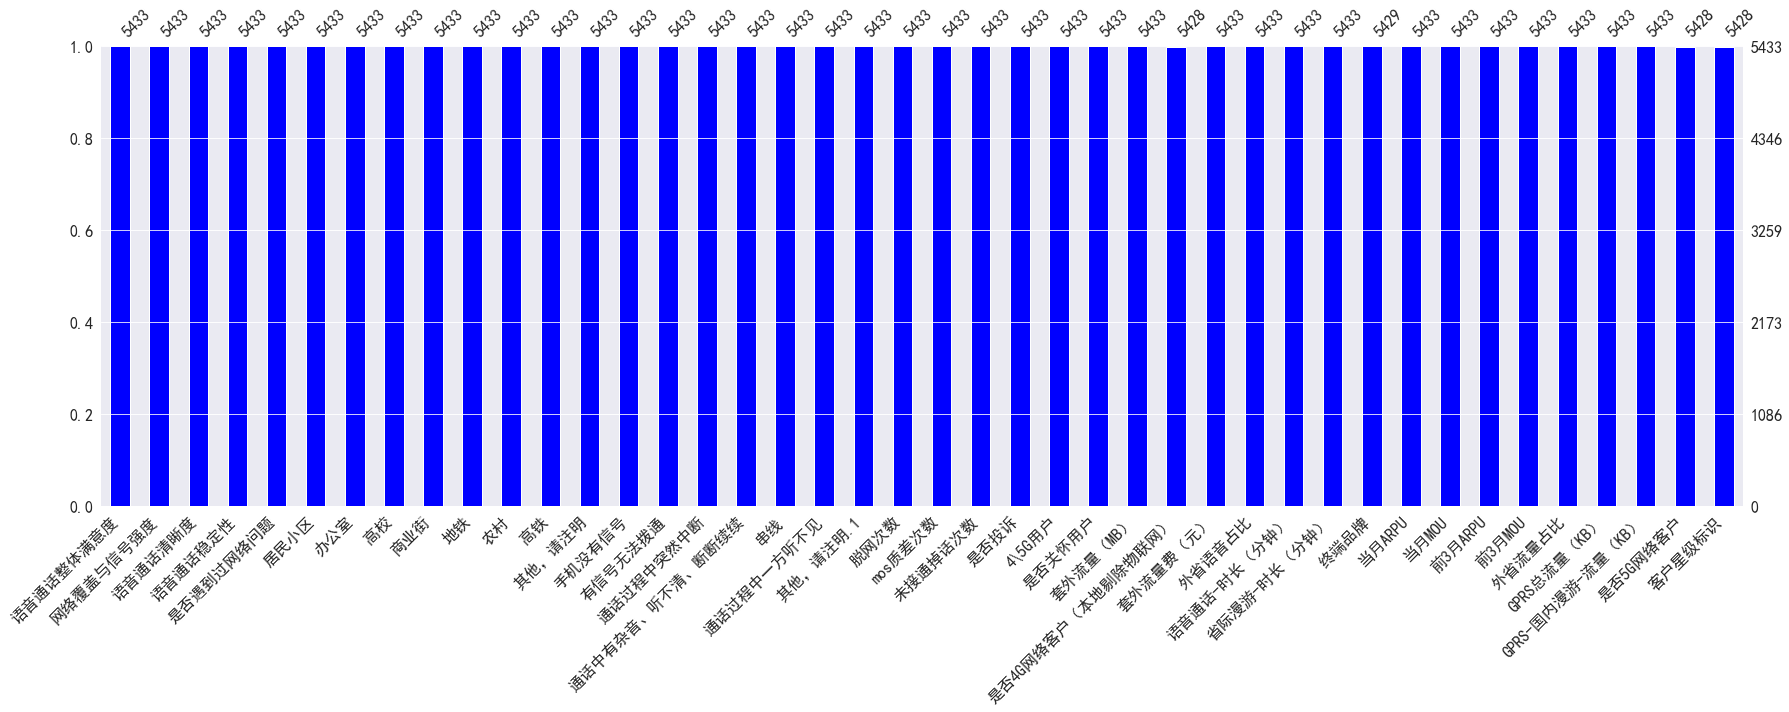

In [20]:
import missingno
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
missingno.bar(dataOne, color='blue')
plt.tight_layout()

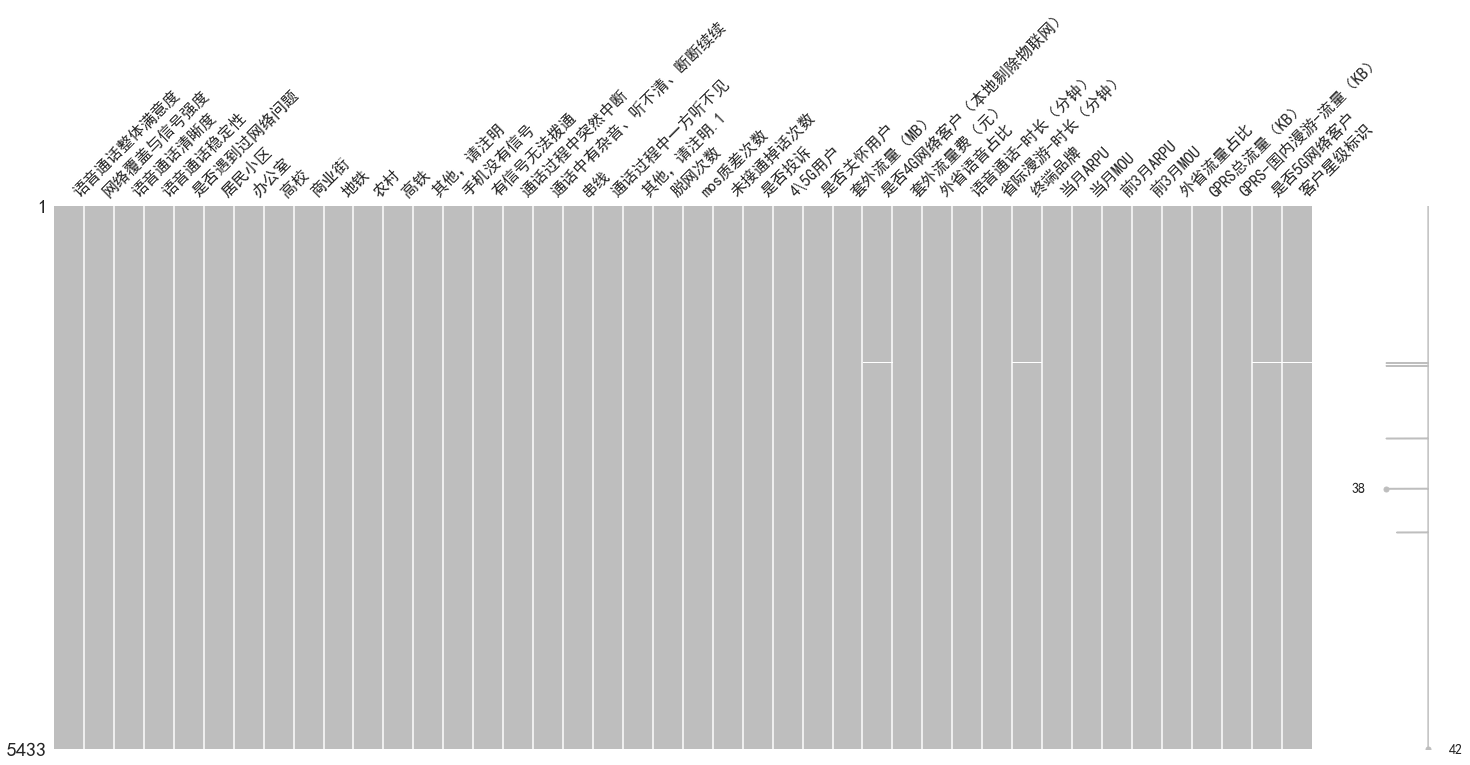

In [21]:
missingno.matrix(dataOne, color=(190/255,190/255,190/255))
plt.savefig('figuresOne\\[附件1]附件1空缺值可视化.pdf', bbox_inches='tight')

### 空缺值处理

In [22]:
dataOneMiss=dataOne.isnull()
dataOne[dataOneMiss.any(axis=1)==True]

,语音通话整体满意度,网络覆盖与信号强度,语音通话清晰度,语音通话稳定性,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,...,终端品牌,当月ARPU,当月MOU,前3月ARPU,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,客户星级标识
1572,10,10,10,10,0,0,0,0,0,0,...,NaN,0.0,0,0.0,0,0.0,0,0,NaN,NaN
1600,7,7,8,7,1,0,1,0,0,0,...,NaN,0.0,0,0.0,0,0.0,0,0,NaN,NaN
2326,10,10,10,10,0,0,0,0,0,0,...,NaN,0.0,0,0.0,0,0.0,0,0,NaN,NaN
2827,9,9,9,9,0,0,0,0,0,0,...,NaN,0.0,0,0.0,0,0.0,0,0,NaN,NaN
3265,4,3,2,4,1,1,0,1,1,0,...,其他,0.0,0,0.0,0,0.0,0,0,NaN,NaN


In [23]:
dataOne.dropna(inplace=True)
dataOne=dataOne.reset_index(drop=True)
dataOne

,语音通话整体满意度,网络覆盖与信号强度,语音通话清晰度,语音通话稳定性,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,...,终端品牌,当月ARPU,当月MOU,前3月ARPU,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,客户星级标识
0,10,6,6,6,1,0,1,0,0,0,...,苹果,347.32,644,0.0,480,1.0,8450801,8450801,1.0,5.0
1,2,1,1,1,1,1,1,0,1,0,...,华为,111.40,902,0.0,480,1.0,17425910,17425910,1.0,5.0
2,10,7,7,7,1,0,0,0,0,0,...,华为,48.00,322,0.0,413,1.0,6215849,6215849,0.0,4.0
3,6,7,7,6,1,1,1,0,0,0,...,苹果,49.00,139,0.0,301,1.0,5370710,5370710,1.0,4.0
4,5,5,4,3,1,0,1,0,0,1,...,苹果,138.10,787,0.0,1193,1.0,3857521,3857521,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5423,10,10,10,8,1,0,1,0,0,0,...,苹果,57.00,293,0.0,320,0.0,16654303,0,0.0,3.0
5424,10,10,10,10,1,1,1,0,0,0,...,苹果,179.89,1277,0.0,147,0.0,627901,0,1.0,4.0
5425,6,5,7,4,1,0,0,0,1,0,...,华为,90.00,115,0.0,150,0.0,6816663,0,0.0,5.0
5426,9,9,10,9,1,0,0,0,0,1,...,小米科技,19.00,179,0.0,82,0.0,1841891,0,0.0,4.0


In [24]:
dataOne.dtypes

语音通话整体满意度              int64
网络覆盖与信号强度              int64
语音通话清晰度                int64
语音通话稳定性                int64
是否遇到过网络问题              int64
居民小区                   int64
办公室                    int64
高校                     int64
商业街                    int64
地铁                     int64
农村                     int64
高铁                     int64
其他，请注明                 int64
手机没有信号                 int64
有信号无法拨通                int64
通话过程中突然中断              int64
通话中有杂音、听不清、断断续续        int64
串线                     int64
通话过程中一方听不见             int64
其他，请注明.1               int64
脱网次数                   int64
mos质差次数                int64
未接通掉话次数                int64
是否投诉                   int64
4\5G用户                object
是否关怀用户                 int64
套外流量（MB）             float64
是否4G网络客户（本地剔除物联网）    float64
套外流量费（元）             float64
外省语音占比                object
语音通话-时长（分钟）            int64
省际漫游-时长（分钟）            int64
终端品牌                  object
当月ARPU               float64
当月MOU         

### 格式转化

In [25]:
dataOne['外省语音占比'] = dataOne['外省语音占比'].astype('float64')
dataOne['外省流量占比'] = dataOne['外省流量占比'].astype('float64')
dataOne['是否4G网络客户（本地剔除物联网）'] = dataOne['是否4G网络客户（本地剔除物联网）'].astype('int64')
dataOne['4\\5G用户'] = dataOne['4\\5G用户'].astype(str)
dataOne['终端品牌'] = dataOne['终端品牌'].astype(str)
dataOne

,语音通话整体满意度,网络覆盖与信号强度,语音通话清晰度,语音通话稳定性,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,...,终端品牌,当月ARPU,当月MOU,前3月ARPU,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,客户星级标识
0,10,6,6,6,1,0,1,0,0,0,...,苹果,347.32,644,0.0,480,1.0,8450801,8450801,1.0,5.0
1,2,1,1,1,1,1,1,0,1,0,...,华为,111.40,902,0.0,480,1.0,17425910,17425910,1.0,5.0
2,10,7,7,7,1,0,0,0,0,0,...,华为,48.00,322,0.0,413,1.0,6215849,6215849,0.0,4.0
3,6,7,7,6,1,1,1,0,0,0,...,苹果,49.00,139,0.0,301,1.0,5370710,5370710,1.0,4.0
4,5,5,4,3,1,0,1,0,0,1,...,苹果,138.10,787,0.0,1193,1.0,3857521,3857521,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5423,10,10,10,8,1,0,1,0,0,0,...,苹果,57.00,293,0.0,320,0.0,16654303,0,0.0,3.0
5424,10,10,10,10,1,1,1,0,0,0,...,苹果,179.89,1277,0.0,147,0.0,627901,0,1.0,4.0
5425,6,5,7,4,1,0,0,0,1,0,...,华为,90.00,115,0.0,150,0.0,6816663,0,0.0,5.0
5426,9,9,10,9,1,0,0,0,0,1,...,小米科技,19.00,179,0.0,82,0.0,1841891,0,0.0,4.0


### 标签编码，包括四项评分，视为分类问题

In [26]:
le=sp.LabelEncoder()

OverallSatisfactionVoiceCalls=le.fit_transform(dataOne["语音通话整体满意度"])
NetworkCoverageSignalStrength=le.fit_transform(dataOne["网络覆盖与信号强度"])
VoiceCallDefinition=le.fit_transform(dataOne["语音通话清晰度"])
VoiceCallStability=le.fit_transform(dataOne["语音通话稳定性"])

FourFiveUser=le.fit_transform(dataOne["4\\5G用户"])
TerminalBrand=le.fit_transform(dataOne["终端品牌"])

dataOne["语音通话整体满意度"]=pd.DataFrame(OverallSatisfactionVoiceCalls)
dataOne["网络覆盖与信号强度"]=pd.DataFrame(NetworkCoverageSignalStrength)
dataOne["语音通话清晰度"]=pd.DataFrame(VoiceCallDefinition)
dataOne["语音通话稳定性"]=pd.DataFrame(VoiceCallStability)

dataOne["4\\5G用户"]=pd.DataFrame(FourFiveUser)
dataOne["终端品牌"]=pd.DataFrame(TerminalBrand)
dataOne

,语音通话整体满意度,网络覆盖与信号强度,语音通话清晰度,语音通话稳定性,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,...,终端品牌,当月ARPU,当月MOU,前3月ARPU,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,客户星级标识
0,9,5,5,5,1,0,1,0,0,0,...,22,347.32,644,0.0,480,1.0,8450801,8450801,1.0,5.0
1,1,0,0,0,1,1,1,0,1,0,...,11,111.40,902,0.0,480,1.0,17425910,17425910,1.0,5.0
2,9,6,6,6,1,0,0,0,0,0,...,11,48.00,322,0.0,413,1.0,6215849,6215849,0.0,4.0
3,5,6,6,5,1,1,1,0,0,0,...,22,49.00,139,0.0,301,1.0,5370710,5370710,1.0,4.0
4,4,4,3,2,1,0,1,0,0,1,...,22,138.10,787,0.0,1193,1.0,3857521,3857521,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5423,9,9,9,7,1,0,1,0,0,0,...,22,57.00,293,0.0,320,0.0,16654303,0,0.0,3.0
5424,9,9,9,9,1,1,1,0,0,0,...,22,179.89,1277,0.0,147,0.0,627901,0,1.0,4.0
5425,5,4,6,3,1,0,0,0,1,0,...,11,90.00,115,0.0,150,0.0,6816663,0,0.0,5.0
5426,8,8,9,8,1,0,0,0,0,1,...,14,19.00,179,0.0,82,0.0,1841891,0,0.0,4.0


### 处理"是否投诉"指标

In [27]:
def complain(x):
    if x!=0:
        return 1
    else:
        return 0


for i in range(len(dataOne)):
    dataOne.loc[i, '是否投诉']=complain(dataOne.loc[i, '是否投诉'])

dataOne

,语音通话整体满意度,网络覆盖与信号强度,语音通话清晰度,语音通话稳定性,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,...,终端品牌,当月ARPU,当月MOU,前3月ARPU,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,客户星级标识
0,9,5,5,5,1,0,1,0,0,0,...,22,347.32,644,0.0,480,1.0,8450801,8450801,1.0,5.0
1,1,0,0,0,1,1,1,0,1,0,...,11,111.40,902,0.0,480,1.0,17425910,17425910,1.0,5.0
2,9,6,6,6,1,0,0,0,0,0,...,11,48.00,322,0.0,413,1.0,6215849,6215849,0.0,4.0
3,5,6,6,5,1,1,1,0,0,0,...,22,49.00,139,0.0,301,1.0,5370710,5370710,1.0,4.0
4,4,4,3,2,1,0,1,0,0,1,...,22,138.10,787,0.0,1193,1.0,3857521,3857521,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5423,9,9,9,7,1,0,1,0,0,0,...,22,57.00,293,0.0,320,0.0,16654303,0,0.0,3.0
5424,9,9,9,9,1,1,1,0,0,0,...,22,179.89,1277,0.0,147,0.0,627901,0,1.0,4.0
5425,5,4,6,3,1,0,0,0,1,0,...,11,90.00,115,0.0,150,0.0,6816663,0,0.0,5.0
5426,8,8,9,8,1,0,0,0,0,1,...,14,19.00,179,0.0,82,0.0,1841891,0,0.0,4.0


In [28]:
dataOne.dtypes

语音通话整体满意度              int64
网络覆盖与信号强度              int64
语音通话清晰度                int64
语音通话稳定性                int64
是否遇到过网络问题              int64
居民小区                   int64
办公室                    int64
高校                     int64
商业街                    int64
地铁                     int64
农村                     int64
高铁                     int64
其他，请注明                 int64
手机没有信号                 int64
有信号无法拨通                int64
通话过程中突然中断              int64
通话中有杂音、听不清、断断续续        int64
串线                     int64
通话过程中一方听不见             int64
其他，请注明.1               int64
脱网次数                   int64
mos质差次数                int64
未接通掉话次数                int64
是否投诉                   int64
4\5G用户                 int32
是否关怀用户                 int64
套外流量（MB）             float64
是否4G网络客户（本地剔除物联网）      int64
套外流量费（元）             float64
外省语音占比               float64
语音通话-时长（分钟）            int64
省际漫游-时长（分钟）            int64
终端品牌                   int32
当月ARPU               float64
当月MOU         

### 格式转化

In [29]:
dataOne['是否5G网络客户'] = dataOne['是否5G网络客户'].astype('int64')
dataOne['客户星级标识'] = dataOne['客户星级标识'].astype('int64')
dataOne

,语音通话整体满意度,网络覆盖与信号强度,语音通话清晰度,语音通话稳定性,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,...,终端品牌,当月ARPU,当月MOU,前3月ARPU,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,客户星级标识
0,9,5,5,5,1,0,1,0,0,0,...,22,347.32,644,0.0,480,1.0,8450801,8450801,1,5
1,1,0,0,0,1,1,1,0,1,0,...,11,111.40,902,0.0,480,1.0,17425910,17425910,1,5
2,9,6,6,6,1,0,0,0,0,0,...,11,48.00,322,0.0,413,1.0,6215849,6215849,0,4
3,5,6,6,5,1,1,1,0,0,0,...,22,49.00,139,0.0,301,1.0,5370710,5370710,1,4
4,4,4,3,2,1,0,1,0,0,1,...,22,138.10,787,0.0,1193,1.0,3857521,3857521,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5423,9,9,9,7,1,0,1,0,0,0,...,22,57.00,293,0.0,320,0.0,16654303,0,0,3
5424,9,9,9,9,1,1,1,0,0,0,...,22,179.89,1277,0.0,147,0.0,627901,0,1,4
5425,5,4,6,3,1,0,0,0,1,0,...,11,90.00,115,0.0,150,0.0,6816663,0,0,5
5426,8,8,9,8,1,0,0,0,0,1,...,14,19.00,179,0.0,82,0.0,1841891,0,0,4


In [30]:
dataOne.describe()

,语音通话整体满意度,网络覆盖与信号强度,语音通话清晰度,语音通话稳定性,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,...,终端品牌,当月ARPU,当月MOU,前3月ARPU,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,客户星级标识
count,5428.000000,5428.000000,5428.000000,5428.000000,5428.000000,5428.000000,5428.000000,5428.000000,5428.000000,5428.000000,...,5428.000000,5428.000000,5428.000000,5428.000000,5428.000000,5428.000000,5.428000e+03,5.428000e+03,5428.000000,5428.000000
mean,7.680545,7.340088,7.633751,7.428703,0.526529,0.339352,0.204864,0.021371,0.080877,0.223102,...,16.157885,85.144040,463.557111,0.618769,463.522476,0.054622,1.806673e+07,9.740573e+05,0.383935,4.145173
std,2.261268,2.419601,2.203064,2.374136,0.499342,0.473533,0.403639,0.144630,0.272671,0.416365,...,5.294143,68.474887,657.454919,6.288590,632.885365,0.212554,3.243160e+07,6.038611e+06,0.486387,0.947255
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,7.000000,7.000000,7.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.000000,39.260000,170.000000,0.000000,182.000000,0.000000,4.622197e+06,0.000000e+00,0.000000,4.000000
50%,9.000000,8.000000,9.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,14.000000,68.000000,298.000000,0.000000,307.500000,0.000000,1.200827e+07,0.000000e+00,0.000000,4.000000
75%,9.000000,9.000000,9.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,22.000000,115.000000,561.250000,0.000000,546.250000,0.000000,2.395730e+07,0.000000e+00,1.000000,5.000000
max,9.000000,9.000000,9.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,26.000000,892.720000,29493.000000,199.000000,31066.000000,1.000000,1.892487e+09,1.745414e+08,1.000000,8.000000


### 数据可视化

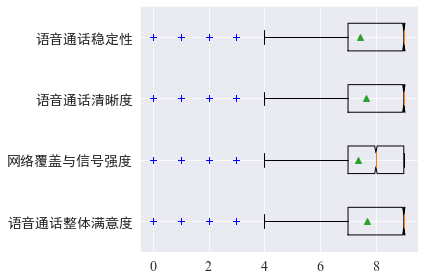

In [31]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

box_data = dataOne[['语音通话整体满意度',
                    '网络覆盖与信号强度',
                    '语音通话清晰度',
                    '语音通话稳定性',]]
plt.grid(True)
plt.boxplot(box_data,
            notch = True,
            sym = "b+",
            vert = False,
            showmeans = True,
            labels = ['语音通话整体满意度',
                      '网络覆盖与信号强度',
                      '语音通话清晰度',
                      '语音通话稳定性',])
plt.yticks(size=14)
plt.xticks(size=14, font='Times New Roman')
plt.tight_layout()
plt.savefig('figuresOne\\[附件1][语音通话整体满意度、网络覆盖与信号强度、语音通话清晰度、语音通话稳定性]评分箱线图.pdf')

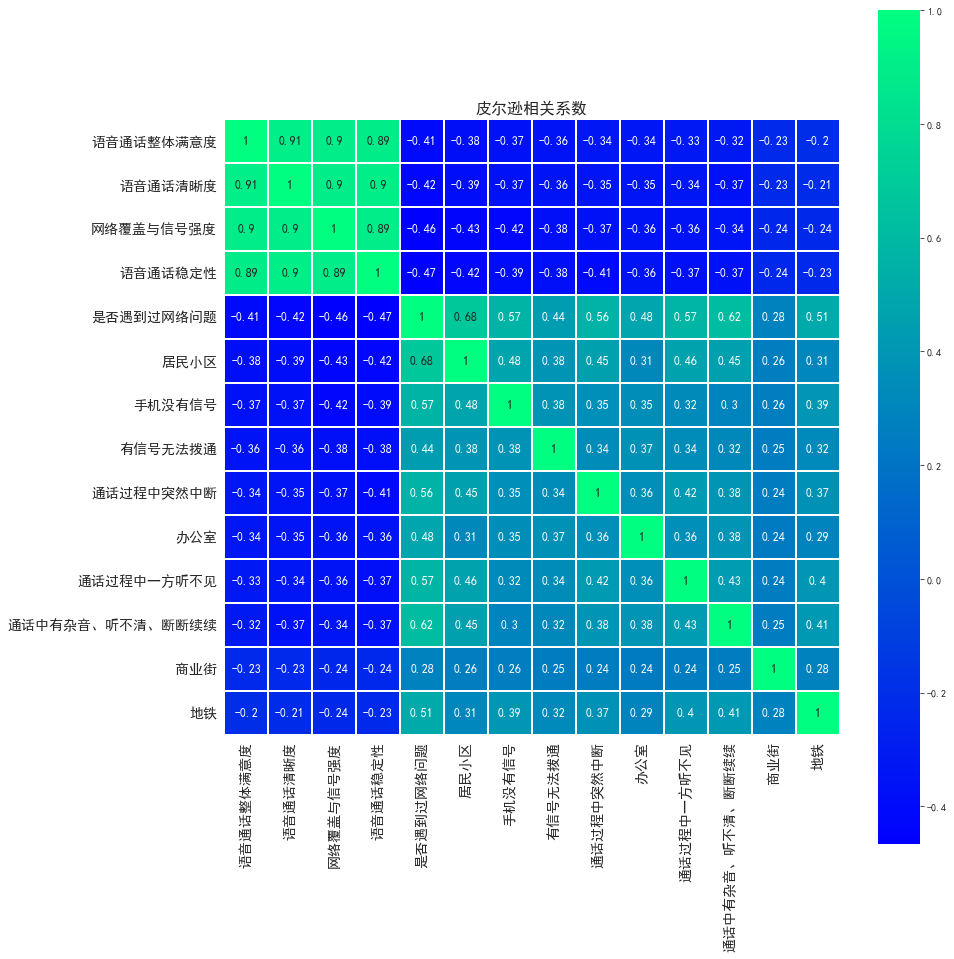

In [32]:
import seaborn as sns

plt.style.use('ggplot')
sns.set_style('whitegrid')
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] =False
CorrDataOneAll = dataOne.corr().abs()
N = 14
ColDataOneRange = CorrDataOneAll.nlargest(N,'语音通话整体满意度')['语音通话整体满意度'].index
plt.subplots(figsize = (N, N))
plt.title('皮尔逊相关系数', size=16)
sns.heatmap(dataOne[ColDataOneRange].corr(),
            linewidths=0.1,
            vmax=1.0,
            square=True,
            cmap=plt.cm.winter,
            linecolor='white',
            annot=True,
            annot_kws={"size":12})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('figuresOne\\[附件1]皮尔逊相关系数（14个）.pdf')

<AxesSubplot:title={'center':'RadViz for 10 Features'}>

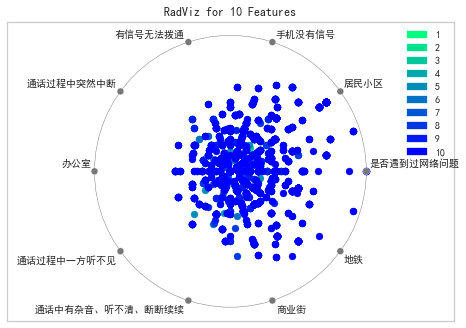

In [33]:
from yellowbrick.features.radviz import RadViz
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

x=dataOne[['是否遇到过网络问题','居民小区','手机没有信号','有信号无法拨通',
           '通话过程中突然中断','办公室','通话过程中一方听不见','通话中有杂音、听不清、断断续续',
           '商业街','地铁']]
y=dataOne['语音通话整体满意度']

classes = ['1','2','3','4','5','6','7','8','9','10']
visualizer = RadViz(classes=classes, colormap='winter_r')
visualizer.fit(x, y)
visualizer.transform(x)
visualizer.show(outpath='figuresOne\\[附件1]语音通话整体满意度RidViz.pdf')

<AxesSubplot:title={'center':'RadViz for 10 Features'}>

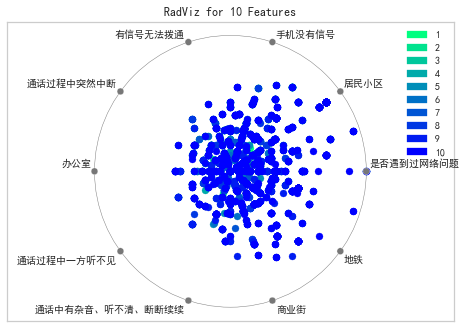

In [34]:
from yellowbrick.features.radviz import RadViz
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

x=dataOne[['是否遇到过网络问题','居民小区','手机没有信号','有信号无法拨通',
           '通话过程中突然中断','办公室','通话过程中一方听不见','通话中有杂音、听不清、断断续续',
           '商业街','地铁']]
y=dataOne['网络覆盖与信号强度']

classes = ['1','2','3','4','5','6','7','8','9','10']
visualizer = RadViz(classes=classes, colormap='winter_r')
visualizer.fit(x, y)
visualizer.transform(x)
visualizer.show(outpath='figuresOne\\[附件1]网络覆盖与信号强度RidViz.pdf')

<AxesSubplot:title={'center':'RadViz for 10 Features'}>

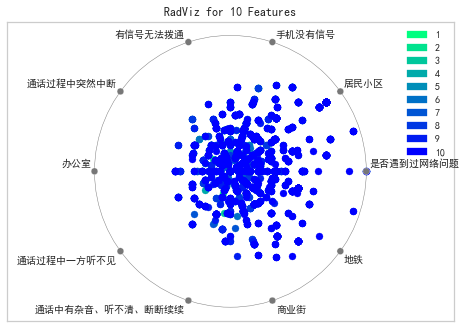

In [35]:
from yellowbrick.features.radviz import RadViz
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

x=dataOne[['是否遇到过网络问题','居民小区','手机没有信号','有信号无法拨通',
           '通话过程中突然中断','办公室','通话过程中一方听不见','通话中有杂音、听不清、断断续续',
           '商业街','地铁']]
y=dataOne['语音通话清晰度']

classes = ['1','2','3','4','5','6','7','8','9','10']
visualizer = RadViz(classes=classes, colormap='winter_r')
visualizer.fit(x, y)
visualizer.transform(x)
visualizer.show(outpath='figuresOne\\[附件1]语音通话清晰度RidViz.pdf')

<AxesSubplot:title={'center':'RadViz for 10 Features'}>

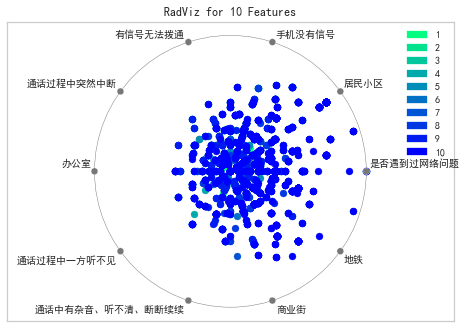

In [36]:
from yellowbrick.features.radviz import RadViz
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

x=dataOne[['是否遇到过网络问题','居民小区','手机没有信号','有信号无法拨通',
           '通话过程中突然中断','办公室','通话过程中一方听不见','通话中有杂音、听不清、断断续续',
           '商业街','地铁']]
y=dataOne['语音通话稳定性']

classes = ['1','2','3','4','5','6','7','8','9','10']
visualizer = RadViz(classes=classes, colormap='winter_r')
visualizer.fit(x, y)
visualizer.transform(x)
visualizer.show(outpath='figuresOne\\[附件1]语音通话稳定性RidViz.pdf')

### 数据标准化

In [37]:
StandardTransform = dataOne[['脱网次数','mos质差次数','未接通掉话次数','4\\5G用户',
                             '套外流量（MB）','套外流量费（元）','语音通话-时长（分钟）','省际漫游-时长（分钟）',
                             '终端品牌','当月ARPU','当月MOU',
                             '前3月ARPU','前3月MOU','GPRS总流量（KB）','GPRS-国内漫游-流量（KB）',
                             '客户星级标识']]
StandardTransformScaler = sp.StandardScaler()
StandardTransformScaler = StandardTransformScaler.fit(StandardTransform)
StandardTransform = StandardTransformScaler.transform(StandardTransform)
StandardTransform = pd.DataFrame(StandardTransform)
StandardTransform.columns = ['脱网次数','mos质差次数','未接通掉话次数','4\\5G用户',
                             '套外流量（MB）','套外流量费（元）','语音通话-时长（分钟）','省际漫游-时长（分钟）',
                             '终端品牌','当月ARPU','当月MOU',
                             '前3月ARPU','前3月MOU','GPRS总流量（KB）','GPRS-国内漫游-流量（KB）',
                             '客户星级标识']
StandardTransform

,脱网次数,mos质差次数,未接通掉话次数,4\5G用户,套外流量（MB）,套外流量费（元）,语音通话-时长（分钟）,省际漫游-时长（分钟）,终端品牌,当月ARPU,当月MOU,前3月ARPU,前3月MOU,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,客户星级标识
0,-0.228243,-0.632682,-0.330666,1.250695,7.048983,15.393069,0.274482,3.878727,1.103607,3.829143,0.274482,-0.098405,0.026038,-0.296526,1.238270,0.902508
1,-0.228243,-0.632682,-0.330666,1.250695,-0.095654,-0.146920,0.666940,5.498227,-0.974352,0.383475,0.666940,-0.098405,0.026038,-0.019761,2.724694,0.902508
2,-0.228243,-0.632682,-0.330666,-0.761389,-0.095654,-0.146920,-0.215331,1.857491,-0.974352,-0.542498,-0.215331,-0.098405,-0.079836,-0.365445,0.868126,-0.153271
3,-0.228243,-0.632682,-0.330666,1.250695,-0.095654,-0.146920,-0.493702,0.708776,1.103607,-0.527892,-0.493702,-0.098405,-0.256820,-0.391507,0.728157,-0.153271
4,-0.228243,-0.632682,-0.330666,-0.761389,-0.095654,-0.146920,0.492007,4.776357,1.103607,0.773434,0.492007,-0.098405,1.152728,-0.438169,0.477548,0.902508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5423,-0.228243,0.031830,-0.330666,-0.761389,-0.095654,-0.146920,-0.259444,-0.163745,1.103607,-0.411050,-0.259444,-0.098405,-0.226796,-0.043555,-0.161320,-1.209050
5424,-0.198739,0.430537,1.987768,1.250695,-0.095654,-0.146920,1.237374,-0.163745,1.103607,1.383787,1.237374,-0.098405,-0.500172,-0.537761,-0.161320,-0.153271
5425,-0.228243,-0.632682,-0.330666,-0.761389,-0.095654,-0.146920,-0.530210,-0.163745,-0.974352,0.070922,-0.530210,-0.098405,-0.495432,-0.346918,-0.161320,0.902508
5426,-0.228243,0.430537,-0.330666,-0.761389,-0.095654,-0.146920,-0.432856,-0.163745,-0.407636,-0.966050,-0.432856,-0.098405,-0.602886,-0.500325,-0.161320,-0.153271


In [38]:
dataOneLeave=dataOne.loc[:,~dataOne.columns.isin(['脱网次数','mos质差次数','未接通掉话次数','4\\5G用户',
                                                  '套外流量（MB）','套外流量费（元）','语音通话-时长（分钟）','省际漫游-时长（分钟）',
                                                  '终端品牌','当月ARPU','当月MOU',
                                                  '前3月ARPU','前3月MOU','GPRS总流量（KB）','GPRS-国内漫游-流量（KB）',
                                                  '客户星级标识'])]

In [39]:
dataOneNewStandard=pd.concat([dataOneLeave, StandardTransform],axis=1)
dataOneNewStandard

,语音通话整体满意度,网络覆盖与信号强度,语音通话清晰度,语音通话稳定性,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,...,语音通话-时长（分钟）,省际漫游-时长（分钟）,终端品牌,当月ARPU,当月MOU,前3月ARPU,前3月MOU,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,客户星级标识
0,9,5,5,5,1,0,1,0,0,0,...,0.274482,3.878727,1.103607,3.829143,0.274482,-0.098405,0.026038,-0.296526,1.238270,0.902508
1,1,0,0,0,1,1,1,0,1,0,...,0.666940,5.498227,-0.974352,0.383475,0.666940,-0.098405,0.026038,-0.019761,2.724694,0.902508
2,9,6,6,6,1,0,0,0,0,0,...,-0.215331,1.857491,-0.974352,-0.542498,-0.215331,-0.098405,-0.079836,-0.365445,0.868126,-0.153271
3,5,6,6,5,1,1,1,0,0,0,...,-0.493702,0.708776,1.103607,-0.527892,-0.493702,-0.098405,-0.256820,-0.391507,0.728157,-0.153271
4,4,4,3,2,1,0,1,0,0,1,...,0.492007,4.776357,1.103607,0.773434,0.492007,-0.098405,1.152728,-0.438169,0.477548,0.902508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5423,9,9,9,7,1,0,1,0,0,0,...,-0.259444,-0.163745,1.103607,-0.411050,-0.259444,-0.098405,-0.226796,-0.043555,-0.161320,-1.209050
5424,9,9,9,9,1,1,1,0,0,0,...,1.237374,-0.163745,1.103607,1.383787,1.237374,-0.098405,-0.500172,-0.537761,-0.161320,-0.153271
5425,5,4,6,3,1,0,0,0,1,0,...,-0.530210,-0.163745,-0.974352,0.070922,-0.530210,-0.098405,-0.495432,-0.346918,-0.161320,0.902508
5426,8,8,9,8,1,0,0,0,0,1,...,-0.432856,-0.163745,-0.407636,-0.966050,-0.432856,-0.098405,-0.602886,-0.500325,-0.161320,-0.153271


In [40]:
dataOneNewStandard.columns=['语音通话整体满意度','网络覆盖与信号强度','语音通话清晰度','语音通话稳定性',
                            '是否遇到过网络问题','居民小区','办公室','高校',
                            '商业街','地铁','农村','高铁',
                            '其他，请注明','手机没有信号','有信号无法拨通','通话过程中突然中断',
                            '通话中有杂音、听不清、断断续续','串线','通话过程中一方听不见','其他，请注明.1',
                            '是否投诉','是否关怀用户','是否4G网络客户（本地剔除物联网）','外省语音占比',
                            '外省流量占比','是否5G网络客户','脱网次数','mos质差次数',
                            '未接通掉话次数','4\\5G用户','套外流量（MB）','套外流量费（元）',
                            '语音通话-时长（分钟）','省际漫游-时长（分钟）','终端品牌',
                            '当月ARPU','当月MOU','前3月ARPU','前3月MOU',
                            'GPRS总流量（KB）','GPRS-国内漫游-流量（KB）','客户星级标识']
dataOneNewStandard

,语音通话整体满意度,网络覆盖与信号强度,语音通话清晰度,语音通话稳定性,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,...,语音通话-时长（分钟）,省际漫游-时长（分钟）,终端品牌,当月ARPU,当月MOU,前3月ARPU,前3月MOU,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,客户星级标识
0,9,5,5,5,1,0,1,0,0,0,...,0.274482,3.878727,1.103607,3.829143,0.274482,-0.098405,0.026038,-0.296526,1.238270,0.902508
1,1,0,0,0,1,1,1,0,1,0,...,0.666940,5.498227,-0.974352,0.383475,0.666940,-0.098405,0.026038,-0.019761,2.724694,0.902508
2,9,6,6,6,1,0,0,0,0,0,...,-0.215331,1.857491,-0.974352,-0.542498,-0.215331,-0.098405,-0.079836,-0.365445,0.868126,-0.153271
3,5,6,6,5,1,1,1,0,0,0,...,-0.493702,0.708776,1.103607,-0.527892,-0.493702,-0.098405,-0.256820,-0.391507,0.728157,-0.153271
4,4,4,3,2,1,0,1,0,0,1,...,0.492007,4.776357,1.103607,0.773434,0.492007,-0.098405,1.152728,-0.438169,0.477548,0.902508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5423,9,9,9,7,1,0,1,0,0,0,...,-0.259444,-0.163745,1.103607,-0.411050,-0.259444,-0.098405,-0.226796,-0.043555,-0.161320,-1.209050
5424,9,9,9,9,1,1,1,0,0,0,...,1.237374,-0.163745,1.103607,1.383787,1.237374,-0.098405,-0.500172,-0.537761,-0.161320,-0.153271
5425,5,4,6,3,1,0,0,0,1,0,...,-0.530210,-0.163745,-0.974352,0.070922,-0.530210,-0.098405,-0.495432,-0.346918,-0.161320,0.902508
5426,8,8,9,8,1,0,0,0,0,1,...,-0.432856,-0.163745,-0.407636,-0.966050,-0.432856,-0.098405,-0.602886,-0.500325,-0.161320,-0.153271


### 数据归一化

In [41]:
MinMaxTransform = dataOne[['脱网次数','mos质差次数','未接通掉话次数','4\\5G用户',
                           '套外流量（MB）','套外流量费（元）','语音通话-时长（分钟）','省际漫游-时长（分钟）',
                           '终端品牌','当月ARPU','当月MOU',
                           '前3月ARPU','前3月MOU','GPRS总流量（KB）','GPRS-国内漫游-流量（KB）',
                           '客户星级标识']]
MinMaxTransformScaler = sp.MinMaxScaler()
MinMaxTransformScaler = MinMaxTransformScaler.fit(MinMaxTransform)
MinMaxTransform = MinMaxTransformScaler.transform(MinMaxTransform)
MinMaxTransform = pd.DataFrame(MinMaxTransform)
MinMaxTransform.columns = ['脱网次数','mos质差次数','未接通掉话次数','4\\5G用户',
                           '套外流量（MB）','套外流量费（元）','语音通话-时长（分钟）','省际漫游-时长（分钟）',
                           '终端品牌','当月ARPU','当月MOU',
                           '前3月ARPU','前3月MOU','GPRS总流量（KB）','GPRS-国内漫游-流量（KB）',
                           '客户星级标识']
MinMaxTransform

,脱网次数,mos质差次数,未接通掉话次数,4\5G用户,套外流量（MB）,套外流量费（元）,语音通话-时长（分钟）,省际漫游-时长（分钟）,终端品牌,当月ARPU,当月MOU,前3月ARPU,前3月MOU,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,客户星级标识
0,0.000000,0.000000,0.000000,1.0,0.238776,0.5,0.021836,0.185217,0.846154,0.389058,0.021836,0.0,0.015451,4.465448e-03,0.048417,0.625
1,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.030584,0.259419,0.423077,0.124787,0.030584,0.0,0.015451,9.207944e-03,0.099838,0.625
2,0.000000,0.000000,0.000000,0.5,0.000000,0.0,0.010918,0.092609,0.423077,0.053768,0.010918,0.0,0.013294,3.284488e-03,0.035612,0.500
3,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.004713,0.039977,0.846154,0.054888,0.004713,0.0,0.009689,2.837912e-03,0.030770,0.500
4,0.000000,0.000000,0.000000,0.5,0.000000,0.0,0.026684,0.226345,0.846154,0.154696,0.026684,0.0,0.038402,2.038335e-03,0.022101,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5423,0.000000,0.045455,0.000000,0.5,0.000000,0.0,0.009935,0.000000,0.846154,0.063850,0.009935,0.0,0.010301,8.800223e-03,0.000000,0.375
5424,0.000784,0.072727,0.069767,1.0,0.000000,0.0,0.043298,0.000000,0.846154,0.201508,0.043298,0.0,0.004732,3.317862e-04,0.000000,0.500
5425,0.000000,0.000000,0.000000,0.5,0.000000,0.0,0.003899,0.000000,0.423077,0.100815,0.003899,0.0,0.004828,3.601961e-03,0.000000,0.625
5426,0.000000,0.072727,0.000000,0.5,0.000000,0.0,0.006069,0.000000,0.538462,0.021283,0.006069,0.0,0.002640,9.732651e-04,0.000000,0.500


In [42]:
dataOneNewMinMax=pd.concat([dataOneLeave, MinMaxTransform],axis=1)
dataOneNewMinMax.columns=['语音通话整体满意度','网络覆盖与信号强度','语音通话清晰度','语音通话稳定性',
                          '是否遇到过网络问题','居民小区','办公室','高校',
                          '商业街','地铁','农村','高铁',
                          '其他，请注明','手机没有信号','有信号无法拨通','通话过程中突然中断',
                          '通话中有杂音、听不清、断断续续','串线','通话过程中一方听不见','其他，请注明.1',
                          '是否投诉','是否关怀用户','是否4G网络客户（本地剔除物联网）','外省语音占比',
                          '外省流量占比','是否5G网络客户','脱网次数','mos质差次数',
                          '未接通掉话次数','4\\5G用户','套外流量（MB）','套外流量费（元）',
                          '语音通话-时长（分钟）','省际漫游-时长（分钟）','终端品牌',
                          '当月ARPU','当月MOU','前3月ARPU','前3月MOU',
                          'GPRS总流量（KB）','GPRS-国内漫游-流量（KB）','客户星级标识']
dataOneNewMinMax

,语音通话整体满意度,网络覆盖与信号强度,语音通话清晰度,语音通话稳定性,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,...,语音通话-时长（分钟）,省际漫游-时长（分钟）,终端品牌,当月ARPU,当月MOU,前3月ARPU,前3月MOU,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,客户星级标识
0,9,5,5,5,1,0,1,0,0,0,...,0.021836,0.185217,0.846154,0.389058,0.021836,0.0,0.015451,4.465448e-03,0.048417,0.625
1,1,0,0,0,1,1,1,0,1,0,...,0.030584,0.259419,0.423077,0.124787,0.030584,0.0,0.015451,9.207944e-03,0.099838,0.625
2,9,6,6,6,1,0,0,0,0,0,...,0.010918,0.092609,0.423077,0.053768,0.010918,0.0,0.013294,3.284488e-03,0.035612,0.500
3,5,6,6,5,1,1,1,0,0,0,...,0.004713,0.039977,0.846154,0.054888,0.004713,0.0,0.009689,2.837912e-03,0.030770,0.500
4,4,4,3,2,1,0,1,0,0,1,...,0.026684,0.226345,0.846154,0.154696,0.026684,0.0,0.038402,2.038335e-03,0.022101,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5423,9,9,9,7,1,0,1,0,0,0,...,0.009935,0.000000,0.846154,0.063850,0.009935,0.0,0.010301,8.800223e-03,0.000000,0.375
5424,9,9,9,9,1,1,1,0,0,0,...,0.043298,0.000000,0.846154,0.201508,0.043298,0.0,0.004732,3.317862e-04,0.000000,0.500
5425,5,4,6,3,1,0,0,0,1,0,...,0.003899,0.000000,0.423077,0.100815,0.003899,0.0,0.004828,3.601961e-03,0.000000,0.625
5426,8,8,9,8,1,0,0,0,0,1,...,0.006069,0.000000,0.538462,0.021283,0.006069,0.0,0.002640,9.732651e-04,0.000000,0.500


## 熵权法

In [43]:
import copy
def ewm(data):
    label_need = data.keys()[:]
    data1 = data[label_need].values
    data2 = data1
    [m, n] = data2.shape
    data3 = copy.deepcopy(data2)
    y_min = 0.002
    y_max = 1
    for j in range(0, n):
        d_max = max(data2[:, j])
        d_min = min(data2[:, j])
        data3[:, j] = (y_max - y_min) * (data2[:, j] - d_min) / (d_max - d_min) + y_min
    p = copy.deepcopy(data3)
    for j in range(0, n):
        p[:, j] = data3[:, j] / sum(data3[:, j])
    e = copy.deepcopy(data3[0, :])
    for j in range(0, n):
        e[j] = -1 / np.log(m) * sum(p[:, j] * np.log(p[:, j]))
    w = (1 - e) / sum(1 - e)
    total = 0
    for sum_w in range(0, len(w)):
        total = total + w[sum_w]
    print(f'权重为：{w}，权重之和为：{total}')

In [44]:
ewm(dataOneLeave.iloc[:,4:])

权重为：[0.01496021 0.02505836 0.03641437 0.07704357 0.0560385  0.03451948
 0.0534802  0.04689169 0.06483876 0.03060758 0.03981191 0.03117662
 0.02786606 0.0689582  0.03051404 0.0776524  0.07407788 0.07001223
 0.0001474  0.05905717 0.05863646 0.02223691]，权重之和为：1.0000000000000004


In [45]:
dataOneTransform=dataOne[['脱网次数','mos质差次数','未接通掉话次数','4\\5G用户',
                          '套外流量（MB）','套外流量费（元）','语音通话-时长（分钟）','省际漫游-时长（分钟）',
                          '终端品牌','当月ARPU','当月MOU',
                          '前3月ARPU','前3月MOU','GPRS总流量（KB）','GPRS-国内漫游-流量（KB）',
                          '客户星级标识']]
dataOneTransform

,脱网次数,mos质差次数,未接通掉话次数,4\5G用户,套外流量（MB）,套外流量费（元）,语音通话-时长（分钟）,省际漫游-时长（分钟）,终端品牌,当月ARPU,当月MOU,前3月ARPU,前3月MOU,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,客户星级标识
0,0,0,0,2,1816.45,250.0,644,644,22,347.32,644,0.0,480,8450801,8450801,5
1,0,0,0,2,0.00,0.0,902,902,11,111.40,902,0.0,480,17425910,17425910,5
2,0,0,0,1,0.00,0.0,322,322,11,48.00,322,0.0,413,6215849,6215849,4
3,0,0,0,2,0.00,0.0,139,139,22,49.00,139,0.0,301,5370710,5370710,4
4,0,0,0,1,0.00,0.0,787,787,22,138.10,787,0.0,1193,3857521,3857521,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5423,0,5,0,1,0.00,0.0,293,0,22,57.00,293,0.0,320,16654303,0,3
5424,1,8,6,2,0.00,0.0,1277,0,22,179.89,1277,0.0,147,627901,0,4
5425,0,0,0,1,0.00,0.0,115,0,11,90.00,115,0.0,150,6816663,0,5
5426,0,8,0,1,0.00,0.0,179,0,14,19.00,179,0.0,82,1841891,0,4


In [46]:
ewm(dataOneTransform)

权重为：[0.084772   0.05118926 0.07726107 0.00448768 0.13296953 0.12319329
 0.02464983 0.14037644 0.00391949 0.0179984  0.02464983 0.13602396
 0.02202909 0.02553851 0.12881697 0.00212465]，权重之和为：1.0


## 灰色关联

In [47]:
def grey(data):
    label_need = data.keys()[:]
    data1 = data[label_need].values
    [m, n] = data1.shape
    data2 = data1.astype('float')
    data3 = data2
    ymin = 0.002
    ymax = 1
    for j in range(0, n):
        d_max = max(data2[:, j])
        d_min = min(data2[:, j])
        data3[:, j] = (ymax - ymin) * (data2[:, j] - d_min) / (d_max - d_min) + ymin

    for i in range(0, n):
        data3[:, i] = np.abs(data3[:, i] - data3[:, 0])
    data4 = data3
    d_max = np.max(data4)
    d_min = np.min(data4)
    a = 0.5
    data4 = (d_min + a * d_max) / (data4 + a * d_max)
    xs = np.mean(data4, axis=0)
    print(xs)

In [48]:
grey(dataOne.loc[:,~dataOne.columns.isin(['网络覆盖与信号强度','语音通话清晰度','语音通话稳定性'])])

[1.         0.64709426 0.77113359 0.86025635 0.98185396 0.9424202
 0.84816984 0.93509504 0.91226497 0.96256438 0.81996798 0.87966801
 0.82436307 0.79725999 0.96988954 0.81923546 0.98270857 0.98581091
 0.92754473 0.97897485 0.97770304 0.43856899 0.97159874 0.99182839
 0.33748426 0.98903411 0.95562293 0.96705538 0.98562839 0.461625
 0.84866476 0.96705538 0.99196673 0.96832215 0.95456838 0.97808616
 0.98783423 0.74158879 0.49860126]


In [49]:
grey(dataOne.loc[:,~dataOne.columns.isin(['语音通话整体满意度','语音通话清晰度','语音通话稳定性'])])

[1.         0.64709426 0.77113359 0.86025635 0.98185396 0.9424202
 0.84816984 0.93509504 0.91226497 0.96256438 0.81996798 0.87966801
 0.82436307 0.79725999 0.96988954 0.81923546 0.98270857 0.98581091
 0.92754473 0.97897485 0.97770304 0.43856899 0.97159874 0.99182839
 0.33748426 0.98903411 0.95562293 0.96705538 0.98562839 0.461625
 0.84866476 0.96705538 0.99196673 0.96832215 0.95456838 0.97808616
 0.98783423 0.74158879 0.49860126]


In [50]:
grey(dataOne.loc[:,~dataOne.columns.isin(['语音通话整体满意度','网络覆盖与信号强度','语音通话稳定性'])])

[1.         0.64709426 0.77113359 0.86025635 0.98185396 0.9424202
 0.84816984 0.93509504 0.91226497 0.96256438 0.81996798 0.87966801
 0.82436307 0.79725999 0.96988954 0.81923546 0.98270857 0.98581091
 0.92754473 0.97897485 0.97770304 0.43856899 0.97159874 0.99182839
 0.33748426 0.98903411 0.95562293 0.96705538 0.98562839 0.461625
 0.84866476 0.96705538 0.99196673 0.96832215 0.95456838 0.97808616
 0.98783423 0.74158879 0.49860126]


In [51]:
grey(dataOne.loc[:,~dataOne.columns.isin(['语音通话整体满意度','网络覆盖与信号强度','语音通话清晰度'])])

[1.         0.64709426 0.77113359 0.86025635 0.98185396 0.9424202
 0.84816984 0.93509504 0.91226497 0.96256438 0.81996798 0.87966801
 0.82436307 0.79725999 0.96988954 0.81923546 0.98270857 0.98581091
 0.92754473 0.97897485 0.97770304 0.43856899 0.97159874 0.99182839
 0.33748426 0.98903411 0.95562293 0.96705538 0.98562839 0.461625
 0.84866476 0.96705538 0.99196673 0.96832215 0.95456838 0.97808616
 0.98783423 0.74158879 0.49860126]


## 特征工程与机器学习

### 多输出多类别分类

In [52]:
XdataOneMulti=dataOneNewStandard.loc[:,~dataOneNewStandard.columns.isin(['语音通话整体满意度','网络覆盖与信号强度',
                                                                         '语音通话清晰度','语音通话稳定性'])]
ydataOneMulti=dataOneNewStandard[['语音通话整体满意度','网络覆盖与信号强度','语音通话清晰度','语音通话稳定性']]

In [53]:
from sklearn.model_selection import train_test_split
XdataOneMulti_train, XdataOneMulti_test, ydataOneMulti_train, ydataOneMulti_test = train_test_split(XdataOneMulti, ydataOneMulti, test_size=0.2, random_state=2022)

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

DecisionTreeMulti = DecisionTreeClassifier(random_state=2022)
RandomForestMulti = RandomForestClassifier(random_state=2022)
DecisionTreeMulti = DecisionTreeMulti.fit(XdataOneMulti_train, ydataOneMulti_train)
RandomForestMulti = RandomForestMulti.fit(XdataOneMulti_train, ydataOneMulti_train)

In [55]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print(f'决策树平均绝对误差：'
      f'{mean_absolute_error(ydataOneMulti_test, DecisionTreeMulti.predict(XdataOneMulti_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'决策树均方误差：'
      f'{mean_squared_error(ydataOneMulti_test, DecisionTreeMulti.predict(XdataOneMulti_test), sample_weight=None, multioutput="uniform_average")}')
print(f'随机森林平均绝对误差：'
      f'{mean_absolute_error(ydataOneMulti_test, RandomForestMulti.predict(XdataOneMulti_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'随机森林均方误差：'
      f'{mean_squared_error(ydataOneMulti_test, RandomForestMulti.predict(XdataOneMulti_test), sample_weight=None, multioutput="uniform_average")}')

决策树平均绝对误差：1.6477900552486189
决策树均方误差：7.363720073664825
随机森林平均绝对误差：1.3722375690607733
随机森林均方误差：6.635128913443831


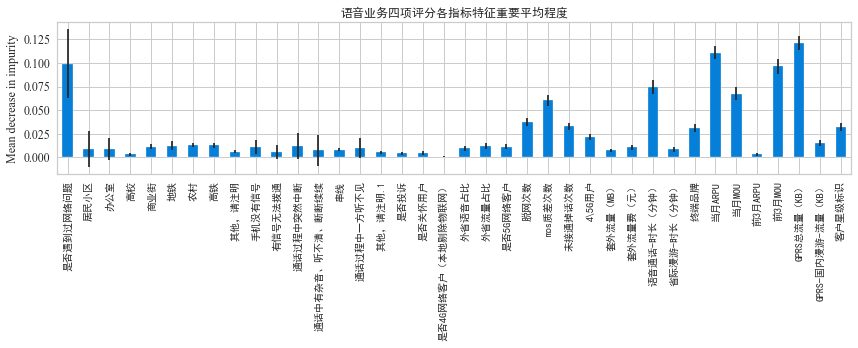

In [56]:
std = np.std([i.feature_importances_ for i in RandomForestMulti.estimators_], axis=0)
importances = DecisionTreeMulti.feature_importances_
feat_with_importance = pd.Series(importances, XdataOneMulti.columns)
fig, ax = plt.subplots(figsize=(12,5))
feat_with_importance.plot.bar(yerr=std, ax=ax, color=(5/255,127/255,215/255))
ax.set_title("语音业务四项评分各指标特征重要平均程度")
ax.set_ylabel("Mean decrease in impurity",font='Times New Roman')
plt.yticks(font='Times New Roman')
plt.tight_layout()
plt.savefig('figuresOne\\[附件1]语音业务四项评分各指标特征重要平均程度.pdf')

In [57]:
feat_with_importance

是否遇到过网络问题            0.099460
居民小区                 0.008645
办公室                  0.008491
高校                   0.003128
商业街                  0.010906
地铁                   0.012065
农村                   0.012350
高铁                   0.012436
其他，请注明               0.005785
手机没有信号               0.010796
有信号无法拨通              0.005759
通话过程中突然中断            0.011715
通话中有杂音、听不清、断断续续      0.006995
串线                   0.007858
通话过程中一方听不见           0.009291
其他，请注明.1             0.005080
是否投诉                 0.004149
是否关怀用户               0.004437
是否4G网络客户（本地剔除物联网）    0.000537
外省语音占比               0.009096
外省流量占比               0.011524
是否5G网络客户             0.011151
脱网次数                 0.037155
mos质差次数              0.060444
未接通掉话次数              0.032685
4\5G用户               0.021234
套外流量（MB）             0.007055
套外流量费（元）             0.010558
语音通话-时长（分钟）          0.074679
省际漫游-时长（分钟）          0.008097
终端品牌                 0.030960
当月ARPU               0.111125
当月MOU                0.067308
前3月ARPU   

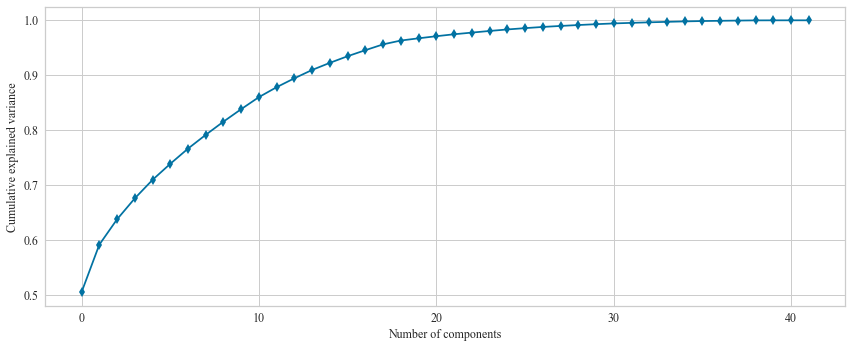

In [58]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(dataOneNewStandard)
evr = pca.explained_variance_ratio_

plt.figure(figsize=(12, 5))
plt.plot(range(0, len(evr)), evr.cumsum(), marker="d", linestyle="-")
plt.xlabel("Number of components",font='Times New Roman')
plt.ylabel("Cumulative explained variance",font='Times New Roman')
plt.xticks(font='Times New Roman')
plt.yticks(font='Times New Roman')
plt.tight_layout()
plt.savefig("figuresOne\\[附件1]PCA累计解释方差图.pdf")

In [59]:
from sklearn.multioutput import MultiOutputClassifier

RandomForestMulti = MultiOutputClassifier(RandomForestClassifier(random_state=2022))
RandomForestMulti = RandomForestMulti.fit(XdataOneMulti_train, ydataOneMulti_train)
RandomForestMulti_score = RandomForestMulti.score(XdataOneMulti_test, ydataOneMulti_test)
print(f'随机森林平均绝对误差：'
      f'{mean_absolute_error(ydataOneMulti_test, RandomForestMulti.predict(XdataOneMulti_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'随机森林均方误差：'
      f'{mean_squared_error(ydataOneMulti_test, RandomForestMulti.predict(XdataOneMulti_test), sample_weight=None, multioutput="uniform_average")}')
RandomForestMulti_score

随机森林平均绝对误差：1.3745395948434622
随机森林均方误差：6.606123388581953


0.39871086556169427

### "语音通话整体满意度"学习

In [60]:
XdataOneFirst=dataOneNewStandard.loc[:,~dataOneNewStandard.columns.isin(['语音通话整体满意度','网络覆盖与信号强度',
                                                                         '语音通话清晰度','语音通话稳定性'])]
ydataOneFirst=dataOneNewStandard['语音通话整体满意度']
XdataOneFirst_train, XdataOneFirst_test, ydataOneFirst_train, ydataOneFirst_test = train_test_split(XdataOneFirst, ydataOneFirst, test_size=0.2, random_state=2022)

#### 决策树，随机森林

In [61]:
DecisionTreeFirst = DecisionTreeClassifier(random_state=2022)
RandomForestFirst = RandomForestClassifier(random_state=2022)
DecisionTreeFirst = DecisionTreeFirst.fit(XdataOneFirst_train, ydataOneFirst_train)
RandomForestFirst = RandomForestFirst.fit(XdataOneFirst_train, ydataOneFirst_train)
RandomForestFirst_score = RandomForestFirst.score(XdataOneFirst_test, ydataOneFirst_test)
RandomForestFirst_score

0.5828729281767956

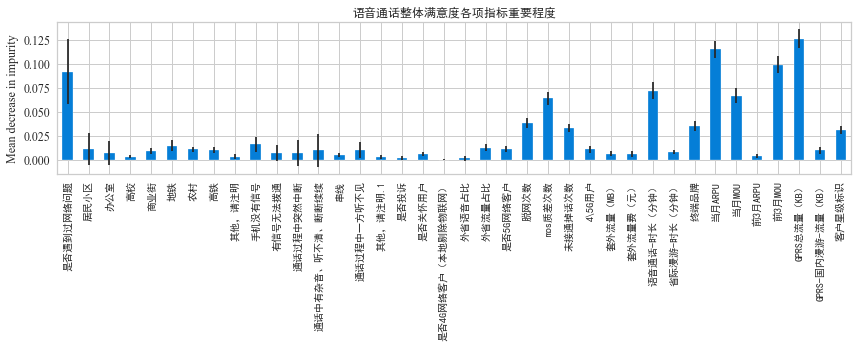

In [62]:
std = np.std([i.feature_importances_ for i in RandomForestFirst.estimators_], axis=0)
importances = DecisionTreeFirst.feature_importances_
feat_with_importance = pd.Series(importances, XdataOneFirst.columns)
fig, ax = plt.subplots(figsize=(12,5))
feat_with_importance.plot.bar(yerr=std, ax=ax, color=(5/255,126/255,215/255))
ax.set_title("语音通话整体满意度各项指标重要程度")
ax.set_ylabel("Mean decrease in impurity",font='Times New Roman')
plt.yticks(font='Times New Roman')
plt.tight_layout()
plt.savefig("figuresOne\\[附件1]语音通话整体满意度各项指标重要程度.pdf")

In [63]:
feat_with_importance

是否遇到过网络问题            0.092219
居民小区                 0.011489
办公室                  0.007340
高校                   0.003903
商业街                  0.009591
地铁                   0.015086
农村                   0.011698
高铁                   0.010741
其他，请注明               0.003989
手机没有信号               0.016707
有信号无法拨通              0.007567
通话过程中突然中断            0.008058
通话中有杂音、听不清、断断续续      0.010471
串线                   0.005271
通话过程中一方听不见           0.011202
其他，请注明.1             0.003602
是否投诉                 0.002780
是否关怀用户               0.006975
是否4G网络客户（本地剔除物联网）    0.000796
外省语音占比               0.002254
外省流量占比               0.013260
是否5G网络客户             0.011639
脱网次数                 0.038761
mos质差次数              0.064490
未接通掉话次数              0.033386
4\5G用户               0.011443
套外流量（MB）             0.007066
套外流量费（元）             0.006322
语音通话-时长（分钟）          0.072568
省际漫游-时长（分钟）          0.008579
终端品牌                 0.035598
当月ARPU               0.115449
当月MOU                0.067078
前3月ARPU   

#### XGBoost

In [64]:
from xgboost import XGBClassifier

XGBFirst = XGBClassifier(learning_rate=0.01,
                         n_estimators=14,
                         max_depth=5,
                         min_child_weight=1,
                         gamma=0.,
                         subsample=1,
                         colsample_btree=1,
                         scale_pos_weight=1,
                         random_state=2022,
                         slient=0)
XGBFirst.fit(XdataOneFirst_train, ydataOneFirst_train)
XGBFirst_score = XGBFirst.score(XdataOneFirst_test, ydataOneFirst_test)
XGBFirst_score

[17:21:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_btree", "scale_pos_weight", "slient" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




0.5948434622467772

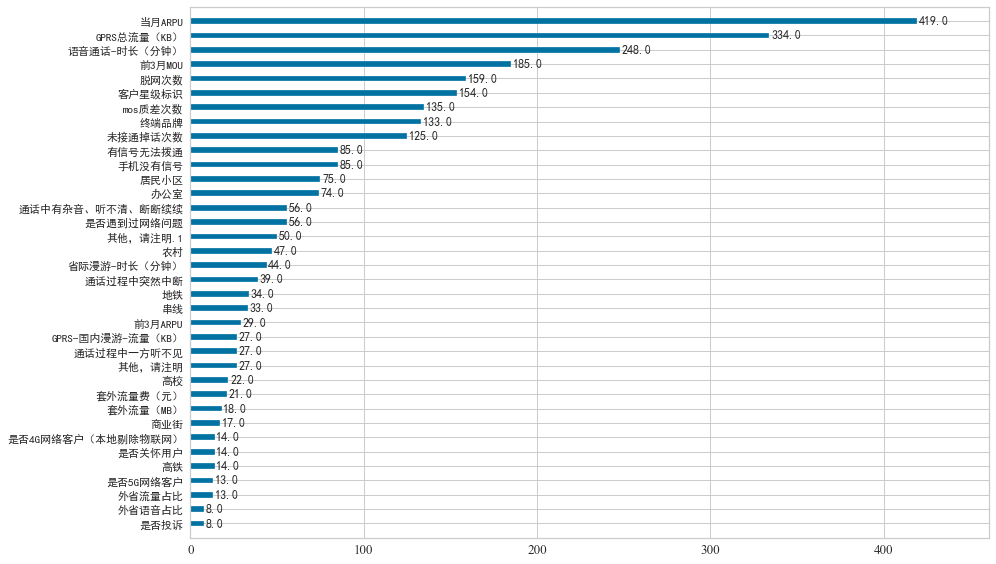

In [65]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(14,8))
plot_importance(XGBFirst, height=0.4, ax=ax)
plt.xticks(fontsize=13, font='Times New Roman')
plt.yticks(fontsize=11)
ax.set_title("")
ax.set_ylabel("")
ax.set_xlabel("")
plt.tight_layout()
plt.savefig('figuresOne\\[附件1]语音通话整体满意度各项指标重要程度（XGBoost,F-score）.pdf')

#### KNN

In [66]:
from sklearn.neighbors import KNeighborsClassifier

KNNFirst = KNeighborsClassifier()
KNNFirst.fit(XdataOneFirst_train, ydataOneFirst_train)
KNNFirst_score = KNNFirst.score(XdataOneFirst_test, ydataOneFirst_test)
KNNFirst_score

0.5184162062615101

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

KNN_turing_param_grid = [{'weights':['uniform'],
                          'n_neighbors':[k for k in range(2,20)]},
                         {'weights':['distance'],
                          'n_neighbors':[k for k in range(2,20)],
                          'p':[p for p in range(1,5)]}]
KNN_turing = KNeighborsClassifier()
KNN_turing_grid_search = GridSearchCV(KNN_turing,
                                      param_grid = KNN_turing_param_grid,
                                      n_jobs = -1,
                                      verbose = 2)
KNN_turing_grid_search.fit(XdataOneFirst_train, ydataOneFirst_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   42.5s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:   58.6s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19],
                          'weights': ['uniform']},
                         {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19],
                          'p': [1, 2, 3, 4], 'weights': ['distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [68]:
KNN_turing_grid_search.best_score_

0.5808379248354749

In [69]:
KNN_turing_grid_search.best_params_

{'n_neighbors': 18, 'p': 2, 'weights': 'distance'}

In [70]:
KNNFirst_new = KNeighborsClassifier(n_neighbors=23, p=1, weights='distance')
KNNFirst_new.fit(XdataOneFirst_train, ydataOneFirst_train)
KNNFirst_new_score = KNNFirst_new.score(XdataOneFirst_test, ydataOneFirst_test)
KNNFirst_new_score

0.5893186003683242

#### 支持向量机

In [71]:
from sklearn.svm import SVC

SVMFirst = SVC(random_state=2022)
SVMFirst.fit(XdataOneFirst_train, ydataOneFirst_train)
SVMFirst_score = SVMFirst.score(XdataOneFirst_test, ydataOneFirst_test)
SVMFirst_score

0.5883977900552486

#### lightgbm

In [72]:
from lightgbm import LGBMClassifier
LightgbmFirst = LGBMClassifier(learning_rate = 0.1,
                               lambda_l1=0.1,
                               lambda_l2=0.2,
                               max_depth=4,
                               objective='multiclass',
                               num_class=3,
                               random_state=2022)
LightgbmFirst.fit(XdataOneFirst_train, ydataOneFirst_train)
LightgbmFirst_score = LightgbmFirst.score(XdataOneFirst_test, ydataOneFirst_test)
LightgbmFirst_score

[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2


0.5736648250460405

#### 逻辑回归

In [73]:
from sklearn.linear_model import LogisticRegression
LogisticRegressionFirst = LogisticRegression(multi_class="multinomial", solver="newton-cg", max_iter=1000)
LogisticRegressionFirst = LogisticRegressionFirst.fit(XdataOneFirst_train, ydataOneFirst_train)
LogisticRegressionFirst_score = LogisticRegressionFirst.score(XdataOneFirst_test, ydataOneFirst_test)
LogisticRegressionFirst_score

0.5828729281767956

In [74]:
print(f'模型一中RF平均绝对误差：'
      f'{mean_absolute_error(ydataOneFirst_test, RandomForestFirst.predict(XdataOneFirst_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型一中RF均方误差：'
      f'{mean_squared_error(ydataOneFirst_test, RandomForestFirst.predict(XdataOneFirst_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型一中XGBoost平均绝对误差：'
      f'{mean_absolute_error(ydataOneFirst_test, XGBFirst.predict(XdataOneFirst_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型一中XGBoost均方误差：'
      f'{mean_squared_error(ydataOneFirst_test, XGBFirst.predict(XdataOneFirst_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型一中KNN平均绝对误差：'
      f'{mean_absolute_error(ydataOneFirst_test, KNNFirst_new.predict(XdataOneFirst_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型一中KNN均方误差：'
      f'{mean_squared_error(ydataOneFirst_test, KNNFirst_new.predict(XdataOneFirst_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型一中SVM平均绝对误差：'
      f'{mean_absolute_error(ydataOneFirst_test, SVMFirst.predict(XdataOneFirst_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型一中SVM均方误差：'
      f'{mean_squared_error(ydataOneFirst_test, SVMFirst.predict(XdataOneFirst_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型一中LightGBM平均绝对误差：'
      f'{mean_absolute_error(ydataOneFirst_test, LightgbmFirst.predict(XdataOneFirst_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型一中LightGBM均方误差：'
      f'{mean_squared_error(ydataOneFirst_test, LightgbmFirst.predict(XdataOneFirst_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型一中LR平均绝对误差：'
      f'{mean_absolute_error(ydataOneFirst_test, LogisticRegressionFirst.predict(XdataOneFirst_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型一中LR均方误差：'
      f'{mean_squared_error(ydataOneFirst_test, LogisticRegressionFirst.predict(XdataOneFirst_test), sample_weight=None, multioutput="uniform_average")}')

模型一中RF平均绝对误差：1.29097605893186
模型一中RF均方误差：6.537753222836096
模型一中XGBoost平均绝对误差：1.2320441988950277
模型一中XGBoost均方误差：6.033149171270718
模型一中KNN平均绝对误差：1.2679558011049723
模型一中KNN均方误差：6.505524861878453
模型一中SVM平均绝对误差：1.358195211786372
模型一中SVM均方误差：7.310313075506445
模型一中LightGBM平均绝对误差：1.236648250460405
模型一中LightGBM均方误差：5.8130755064456725
模型一中LR平均绝对误差：1.232965009208103
模型一中LR均方误差：6.023020257826888


#### 集成学习

In [75]:
from mlxtend.classifier import StackingCVClassifier
FirstModel = StackingCVClassifier(classifiers=[LogisticRegressionFirst,XGBFirst,KNNFirst_new,SVMFirst,LightgbmFirst], meta_classifier=RandomForestClassifier(random_state=2022), random_state=2022, cv=5)
FirstModel.fit(XdataOneFirst_train, ydataOneFirst_train)
FirstModel_score = FirstModel.score(XdataOneFirst_test, ydataOneFirst_test)
FirstModel_score

[17:22:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_btree", "scale_pos_weight", "slient" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:22:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_btree", "scale_pos_weight", "slient" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:22:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner

0.5773480662983426

In [76]:
print(f'模型一平均绝对误差：'
      f'{mean_absolute_error(ydataOneFirst_test, FirstModel.predict(XdataOneFirst_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型一均方误差：'
      f'{mean_squared_error(ydataOneFirst_test, FirstModel.predict(XdataOneFirst_test), sample_weight=None, multioutput="uniform_average")}')

模型一平均绝对误差：1.2937384898710866
模型一均方误差：6.387661141804788


### "网络覆盖与信号强度"学习

In [77]:
XdataOneSecond=dataOneNewStandard.loc[:,~dataOneNewStandard.columns.isin(['语音通话整体满意度','网络覆盖与信号强度',
                                                                          '语音通话清晰度','语音通话稳定性'])]
ydataOneSecond=dataOneNewStandard['网络覆盖与信号强度']
XdataOneSecond_train, XdataOneSecond_test, ydataOneSecond_train, ydataOneSecond_test = train_test_split(XdataOneSecond, ydataOneSecond, test_size=0.2, random_state=2022)

#### 决策树、随机森林

In [78]:
DecisionTreeSecond = DecisionTreeClassifier(random_state=2022)
RandomForestSecond = RandomForestClassifier(random_state=2022)
DecisionTreeSecond = DecisionTreeSecond.fit(XdataOneSecond_train, ydataOneSecond_train)
RandomForestSecond = RandomForestSecond.fit(XdataOneSecond_train, ydataOneSecond_train)
RandomForestSecond_score = RandomForestSecond.score(XdataOneSecond_test, ydataOneSecond_test)
RandomForestSecond_score

0.4852670349907919

0.46224337933987075 161


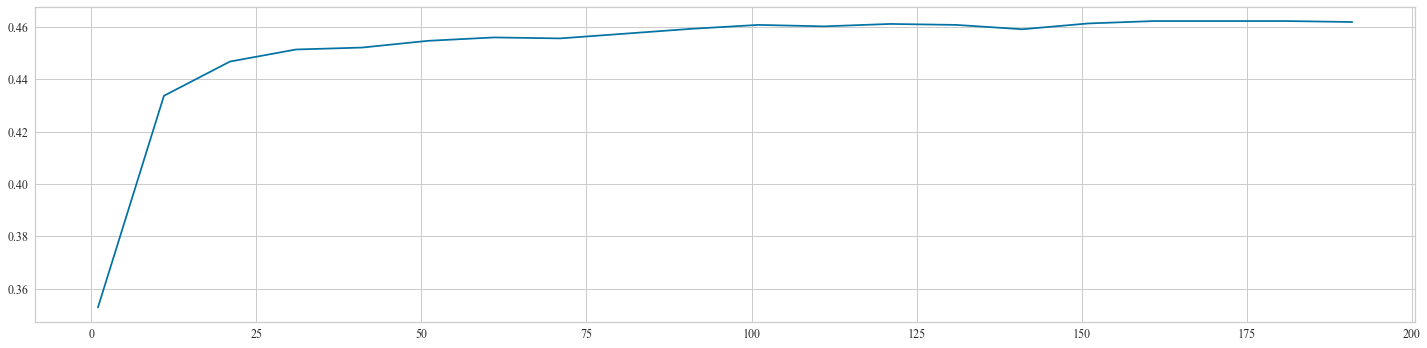

In [79]:
from sklearn.model_selection import cross_val_score
scorel = []
for i in range(0,200,10):
    RFC = RandomForestClassifier(n_estimators=i+1,
                                 n_jobs=-1,
                                 random_state=2022)
    score = cross_val_score(RFC,XdataOneSecond,ydataOneSecond,cv=10).mean()
    scorel.append(score)

print(max(scorel),(scorel.index(max(scorel))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.xticks(fontsize=12, font='Times New Roman')
plt.yticks(fontsize=12, font='Times New Roman')
plt.tight_layout()
plt.savefig("figuresOne\\[附件1]随机森林调参F.pdf")

0.4629790082431211 164


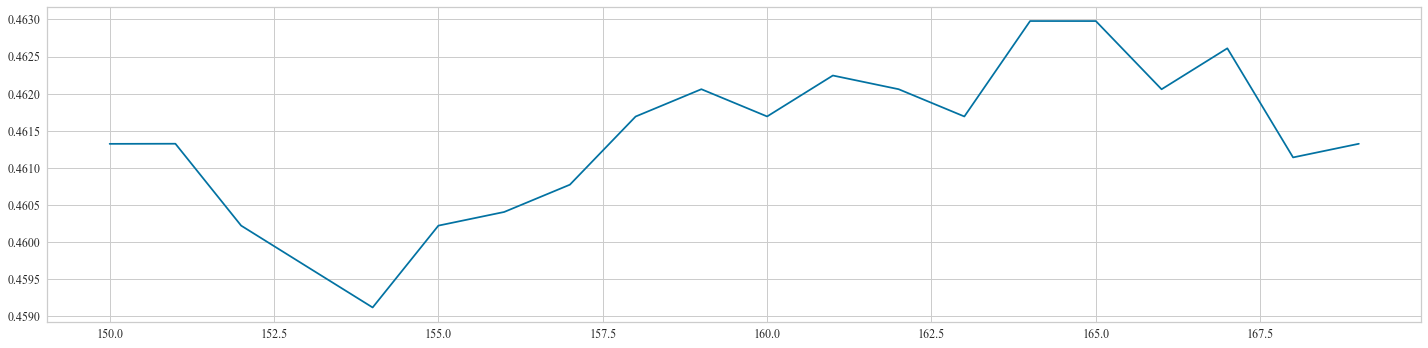

In [80]:
scorel = []
for i in range(150,170):
    RFC = RandomForestClassifier(n_estimators=i,
                                 n_jobs=-1,
                                 random_state=2022)
    score = cross_val_score(RFC,XdataOneSecond,ydataOneSecond,cv=10).mean()
    scorel.append(score)

print(max(scorel),([*range(150,170)][scorel.index(max(scorel))]))
plt.figure(figsize=[20,5])
plt.plot(range(150,170),scorel)
plt.xticks(fontsize=12, font='Times New Roman')
plt.yticks(fontsize=12, font='Times New Roman')
plt.tight_layout()
plt.savefig("figuresOne\\[附件1]随机森林调参S.pdf")

In [81]:
import numpy as np
param_grid = {'max_features':['auto', 'sqrt','log2']}
RFC = RandomForestClassifier(n_estimators=164,random_state=2022)
GS = GridSearchCV(RFC,param_grid,cv=10)
GS.fit(XdataOneSecond,ydataOneSecond)
GS.best_params_

{'max_features': 'log2'}

In [82]:
param_grid = {'min_samples_leaf':np.arange(1, 11, 1)}
RFC = RandomForestClassifier(n_estimators=164,random_state=2022,max_features='log2')
GS = GridSearchCV(RFC,param_grid,cv=10)
GS.fit(XdataOneSecond,ydataOneSecond)
GS.best_params_

{'min_samples_leaf': 8}

In [83]:
param_grid = {'criterion':['gini', 'entropy']}
RFC = RandomForestClassifier(n_estimators=164,random_state=2022,max_features='log2',min_samples_leaf=8)
GS = GridSearchCV(RFC,param_grid,cv=10)
GS.fit(XdataOneSecond,ydataOneSecond)
GS.best_params_

{'criterion': 'gini'}

In [84]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth':np.arange(1, 20, 1)}
RFC = RandomForestClassifier(n_estimators=164,random_state=2022,max_features='log2',min_samples_leaf=8)
GS = GridSearchCV(RFC,param_grid,cv=10)
GS.fit(XdataOneSecond,ydataOneSecond)
GS.best_params_

{'max_depth': 19}

In [85]:
RandomForestSecond = RandomForestClassifier(n_estimators=164, random_state=2022, min_samples_leaf=8, max_depth=19)
RandomForestSecond = RandomForestSecond.fit(XdataOneSecond_train, ydataOneSecond_train)
RandomForestSecond_score = RandomForestSecond.score(XdataOneSecond_test, ydataOneSecond_test)
RandomForestSecond_score

0.5101289134438306

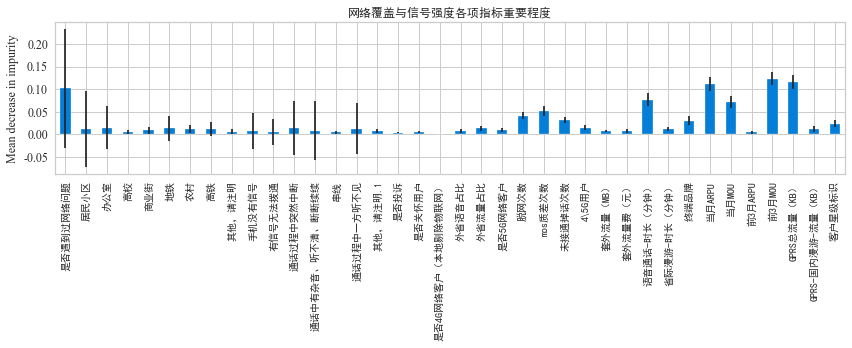

In [86]:
std = np.std([i.feature_importances_ for i in RandomForestSecond.estimators_], axis=0)
importances = DecisionTreeSecond.feature_importances_
feat_with_importance = pd.Series(importances, XdataOneSecond.columns)
fig, ax = plt.subplots(figsize=(12,5))
feat_with_importance.plot.bar(yerr=std, ax=ax, color=(5/255,126/255,215/255))
ax.set_title("网络覆盖与信号强度各项指标重要程度")
ax.set_ylabel("Mean decrease in impurity",font='Times New Roman')
plt.yticks(font='Times New Roman')
plt.tight_layout()
plt.savefig("figuresOne\\[附件1]网络覆盖与信号强度各项指标重要程度.pdf")

In [87]:
feat_with_importance

是否遇到过网络问题            0.101492
居民小区                 0.011183
办公室                  0.014532
高校                   0.003836
商业街                  0.008047
地铁                   0.012587
农村                   0.010622
高铁                   0.011350
其他，请注明               0.005226
手机没有信号               0.007569
有信号无法拨通              0.005141
通话过程中突然中断            0.013368
通话中有杂音、听不清、断断续续      0.007790
串线                   0.003589
通话过程中一方听不见           0.012105
其他，请注明.1             0.006494
是否投诉                 0.002883
是否关怀用户               0.004129
是否4G网络客户（本地剔除物联网）    0.000544
外省语音占比               0.006860
外省流量占比               0.012538
是否5G网络客户             0.009034
脱网次数                 0.040567
mos质差次数              0.051163
未接通掉话次数              0.031940
4\5G用户               0.013733
套外流量（MB）             0.006969
套外流量费（元）             0.007718
语音通话-时长（分钟）          0.076234
省际漫游-时长（分钟）          0.011445
终端品牌                 0.029692
当月ARPU               0.111635
当月MOU                0.071499
前3月ARPU   

#### XGBoost

In [88]:
from xgboost import XGBClassifier

XGBSecond = XGBClassifier(learning_rate=0.02,
                          n_estimators=13,
                          max_depth=8,
                          min_child_weight=1,
                          gamma=0.05,
                          subsample=1,
                          colsample_btree=1,
                          scale_pos_weight=1,
                          random_state=2022,
                          slient=0)
XGBSecond.fit(XdataOneSecond_train, ydataOneSecond_train)
XGBSecond_score = XGBSecond.score(XdataOneSecond_test, ydataOneSecond_test)
XGBSecond_score

[17:30:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_btree", "scale_pos_weight", "slient" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




0.49355432780847147

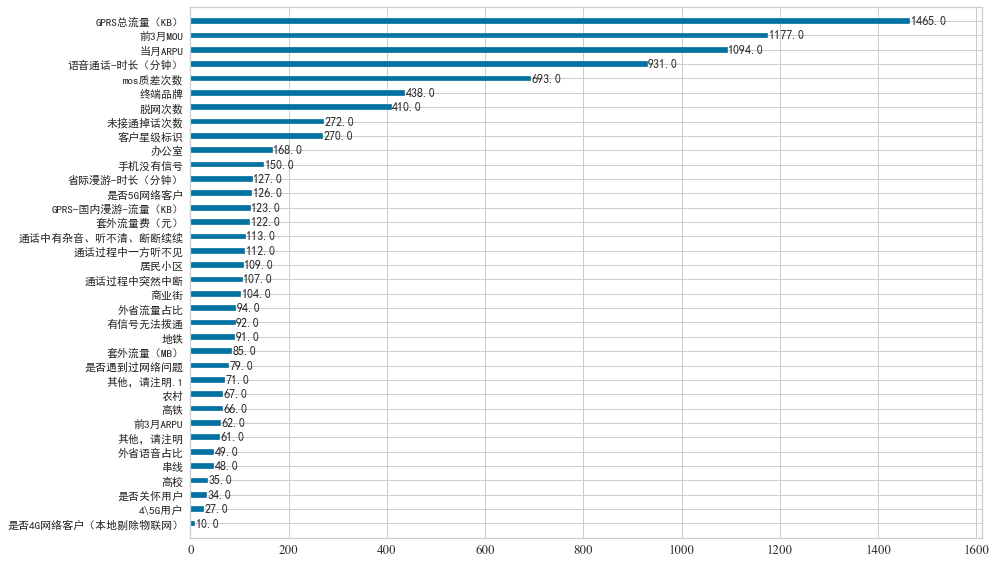

In [89]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(14,8))
plot_importance(XGBSecond, height=0.4, ax=ax)
plt.xticks(fontsize=13, font='Times New Roman')
plt.yticks(fontsize=11)
ax.set_title("")
ax.set_ylabel("")
ax.set_xlabel("")
plt.tight_layout()
plt.savefig('figuresOne\\[附件1]网络覆盖与信号强度各项指标重要程度（XGBoost,F-score）.pdf')

#### KNN

In [90]:
from sklearn.neighbors import KNeighborsClassifier

KNNSecond = KNeighborsClassifier()
KNNSecond.fit(XdataOneSecond_train, ydataOneSecond_train)
KNNSecond_score = KNNSecond.score(XdataOneSecond_test, ydataOneSecond_test)
KNNSecond_score

0.44106813996316757

In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

KNN_turing_param_grid = [{'weights':['uniform'],
                          'n_neighbors':[k for k in range(40,50)]},
                         {'weights':['distance'],
                          'n_neighbors':[k for k in range(40,50)],
                          'p':[p for p in range(1,5)]}]
KNN_turing = KNeighborsClassifier()
KNN_turing_grid_search = GridSearchCV(KNN_turing,
                                      param_grid = KNN_turing_param_grid,
                                      n_jobs = -1,
                                      verbose = 2)
KNN_turing_grid_search.fit(XdataOneSecond_train, ydataOneSecond_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   33.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'n_neighbors': [40, 41, 42, 43, 44, 45, 46, 47, 48,
                                          49],
                          'weights': ['uniform']},
                         {'n_neighbors': [40, 41, 42, 43, 44, 45, 46, 47, 48,
                                          49],
                          'p': [1, 2, 3, 4], 'weights': ['distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [92]:
KNN_turing_grid_search.best_score_

0.503916520392633

In [93]:
KNN_turing_grid_search.best_params_

{'n_neighbors': 48, 'p': 1, 'weights': 'distance'}

In [94]:
KNNSecond_new = KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                     metric='minkowski',
                                     n_jobs=-1,
                                     n_neighbors=46, p=1,
                                     weights='distance')
KNNSecond_new.fit(XdataOneSecond_train, ydataOneSecond_train)
KNNSecond_new_score = KNNSecond_new.score(XdataOneSecond_test, ydataOneSecond_test)
KNNSecond_new_score

0.5009208103130756

#### 支持向量机

In [95]:
from sklearn.svm import SVC

SVMSecond = SVC(random_state=2022)
SVMSecond.fit(XdataOneSecond_train, ydataOneSecond_train)
SVMSecond_score = SVMSecond.score(XdataOneSecond_test, ydataOneSecond_test)
SVMSecond_score

0.4990791896869245

#### lightgbm

In [96]:
from lightgbm import LGBMClassifier
LightgbmSecond = LGBMClassifier(learning_rate = 0.1,
                                lambda_l1=0.1,
                                lambda_l2=0.2,
                                max_depth=3,
                                objective='multiclass',
                                num_class=3,
                                random_state=2022)
LightgbmSecond.fit(XdataOneSecond_train, ydataOneSecond_train)
LightgbmSecond_score = LightgbmSecond.score(XdataOneSecond_test, ydataOneSecond_test)
LightgbmSecond_score

[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2


0.48987108655616945

#### 逻辑回归

In [97]:
from sklearn.linear_model import LogisticRegression
LogisticRegressionSecond = LogisticRegression(multi_class="multinomial", solver="newton-cg", max_iter=2000)
LogisticRegressionSecond = LogisticRegressionSecond.fit(XdataOneSecond_train, ydataOneSecond_train)
LogisticRegressionSecond_score = LogisticRegressionSecond.score(XdataOneSecond_test, ydataOneSecond_test)
LogisticRegressionSecond_score

0.5

In [98]:
print(f'模型二中RF平均绝对误差：'
      f'{mean_absolute_error(ydataOneSecond_test, RandomForestSecond.predict(XdataOneSecond_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型二中RF均方误差：'
      f'{mean_squared_error(ydataOneSecond_test, RandomForestSecond.predict(XdataOneSecond_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型二中XGBoost平均绝对误差：'
      f'{mean_absolute_error(ydataOneSecond_test, XGBSecond.predict(XdataOneSecond_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型二中XGBoost均方误差：'
      f'{mean_squared_error(ydataOneSecond_test, XGBSecond.predict(XdataOneSecond_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型二中KNN平均绝对误差：'
      f'{mean_absolute_error(ydataOneSecond_test, KNNSecond_new.predict(XdataOneSecond_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型二中KNN均方误差：'
      f'{mean_squared_error(ydataOneSecond_test, KNNSecond_new.predict(XdataOneSecond_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型二中SVM平均绝对误差：'
      f'{mean_absolute_error(ydataOneSecond_test, SVMSecond.predict(XdataOneSecond_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型二中SVM均方误差：'
      f'{mean_squared_error(ydataOneSecond_test, SVMSecond.predict(XdataOneSecond_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型二中LightGBM平均绝对误差：'
      f'{mean_absolute_error(ydataOneSecond_test, LightgbmSecond.predict(XdataOneSecond_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型二中LightGBM均方误差：'
      f'{mean_squared_error(ydataOneSecond_test, LightgbmSecond.predict(XdataOneSecond_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型二中LR平均绝对误差：'
      f'{mean_absolute_error(ydataOneSecond_test, LogisticRegressionSecond.predict(XdataOneSecond_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型二中LR均方误差：'
      f'{mean_squared_error(ydataOneSecond_test, LogisticRegressionSecond.predict(XdataOneSecond_test), sample_weight=None, multioutput="uniform_average")}')

模型二中RF平均绝对误差：1.5303867403314917
模型二中RF均方误差：7.607734806629834
模型二中XGBoost平均绝对误差：1.492633517495396
模型二中XGBoost均方误差：7.056169429097606
模型二中KNN平均绝对误差：1.550644567219153
模型二中KNN均方误差：7.692449355432781
模型二中SVM平均绝对误差：1.594843462246777
模型二中SVM均方误差：8.057090239410682
模型二中LightGBM平均绝对误差：1.503683241252302
模型二中LightGBM均方误差：7.129834254143646
模型二中LR平均绝对误差：1.4797421731123388
模型二中LR均方误差：7.010128913443831


#### 集成学习

In [99]:
from mlxtend.classifier import StackingCVClassifier
SecondModel = StackingCVClassifier(classifiers=[RandomForestSecond,XGBSecond,KNNSecond_new,SVMSecond,LogisticRegressionSecond], meta_classifier=LGBMClassifier(random_state=2022), random_state=2022, cv=5)
SecondModel.fit(XdataOneSecond_train, ydataOneSecond_train)
SecondModel_score = SecondModel.score(XdataOneSecond_test, ydataOneSecond_test)
SecondModel_score

[17:30:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_btree", "scale_pos_weight", "slient" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:30:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_btree", "scale_pos_weight", "slient" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:30:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner

0.4880294659300184

In [100]:
print(f'模型二平均绝对误差：'
      f'{mean_absolute_error(ydataOneSecond_test, SecondModel.predict(XdataOneSecond_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型二均方误差：'
      f'{mean_squared_error(ydataOneSecond_test, SecondModel.predict(XdataOneSecond_test), sample_weight=None, multioutput="uniform_average")}')

模型二平均绝对误差：1.5386740331491713
模型二均方误差：7.341620626151013


### "语音通话清晰度"学习

In [101]:
XdataOneThird=dataOneNewStandard.loc[:,~dataOneNewStandard.columns.isin(['语音通话整体满意度','网络覆盖与信号强度',
                                                                         '语音通话清晰度','语音通话稳定性'])]
ydataOneThird=dataOneNewStandard['语音通话清晰度']
XdataOneThird_train, XdataOneThird_test, ydataOneThird_train, ydataOneThird_test = train_test_split(XdataOneThird, ydataOneThird, test_size=0.2, random_state=2022)

#### 决策树、随机森林

In [102]:
DecisionTreeThird = DecisionTreeClassifier(random_state=2022)
RandomForestThird = RandomForestClassifier(random_state=2022)
DecisionTreeThird = DecisionTreeThird.fit(XdataOneThird_train, ydataOneThird_train)
RandomForestThird = RandomForestThird.fit(XdataOneThird_train, ydataOneThird_train)
RandomForestThird_score = RandomForestThird.score(XdataOneThird_test, ydataOneThird_test)
RandomForestThird_score

0.5423572744014733

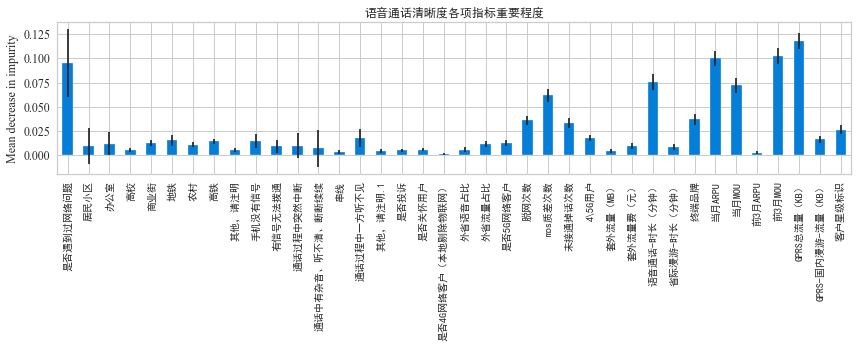

In [103]:
std = np.std([i.feature_importances_ for i in RandomForestThird.estimators_], axis=0)
importances = DecisionTreeThird.feature_importances_
feat_with_importance = pd.Series(importances, XdataOneThird.columns)
fig, ax = plt.subplots(figsize=(12,5))
feat_with_importance.plot.bar(yerr=std, ax=ax, color=(5/255,126/255,215/255))
ax.set_title("语音通话清晰度各项指标重要程度")
ax.set_ylabel("Mean decrease in impurity",font='Times New Roman')
plt.yticks(font='Times New Roman')
plt.tight_layout()
plt.savefig("figuresOne\\[附件1]语音通话清晰度各项指标重要程度.pdf")

In [104]:
feat_with_importance

是否遇到过网络问题            0.095254
居民小区                 0.009146
办公室                  0.011677
高校                   0.004913
商业街                  0.012361
地铁                   0.015183
农村                   0.010472
高铁                   0.014086
其他，请注明               0.005034
手机没有信号               0.014163
有信号无法拨通              0.008711
通话过程中突然中断            0.009598
通话中有杂音、听不清、断断续续      0.006669
串线                   0.003480
通话过程中一方听不见           0.017119
其他，请注明.1             0.003956
是否投诉                 0.004651
是否关怀用户               0.005476
是否4G网络客户（本地剔除物联网）    0.000912
外省语音占比               0.005141
外省流量占比               0.011032
是否5G网络客户             0.012769
脱网次数                 0.036074
mos质差次数              0.061660
未接通掉话次数              0.032784
4\5G用户               0.017669
套外流量（MB）             0.003720
套外流量费（元）             0.008881
语音通话-时长（分钟）          0.075370
省际漫游-时长（分钟）          0.007819
终端品牌                 0.036793
当月ARPU               0.100029
当月MOU                0.072204
前3月ARPU   

#### XGBoost

In [105]:
from xgboost import XGBClassifier

XGBThird = XGBClassifier(learning_rate=0.02,
                         n_estimators=14,
                         max_depth=8,
                         min_child_weight=1,
                         gamma=0.05,
                         subsample=1,
                         colsample_btree=1,
                         scale_pos_weight=1,
                         random_state=2022,
                         slient=0)
XGBThird.fit(XdataOneThird_train, ydataOneThird_train)
XGBThird_score = XGBThird.score(XdataOneThird_test, ydataOneThird_test)
XGBThird_score

[17:31:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_btree", "scale_pos_weight", "slient" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




0.5331491712707183

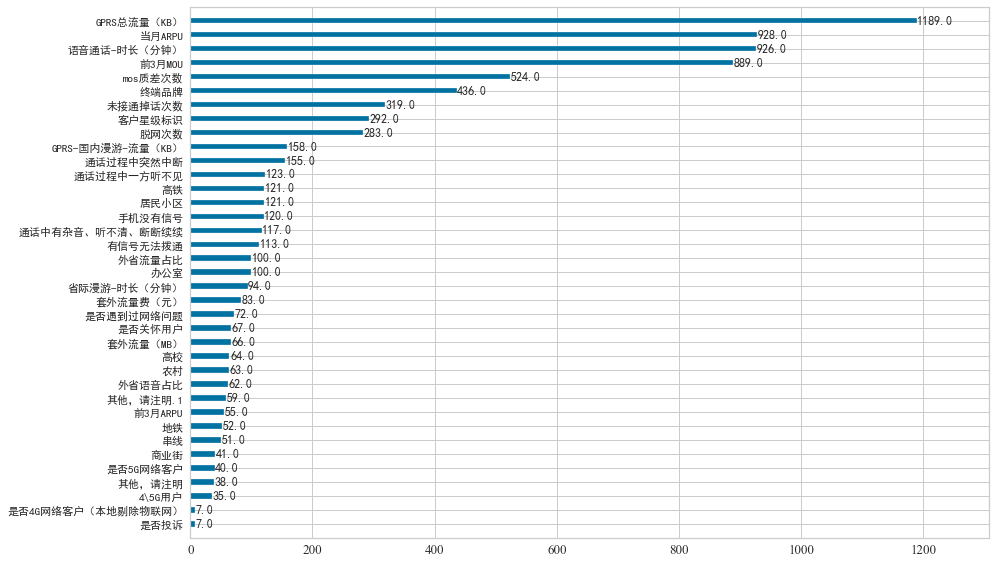

In [106]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(14,8))
plot_importance(XGBThird, height=0.4, ax=ax)
plt.xticks(fontsize=13, font='Times New Roman')
plt.yticks(fontsize=11)
ax.set_title("")
ax.set_ylabel("")
ax.set_xlabel("")
plt.tight_layout()
plt.savefig('figuresOne\\[附件1]语音通话清晰度各项指标重要程度（XGBoost,F-score）.pdf')

#### KNN

In [107]:
from sklearn.neighbors import KNeighborsClassifier

KNNThird = KNeighborsClassifier()
KNNThird.fit(XdataOneThird_train, ydataOneThird_train)
KNNThird_score = KNNThird.score(XdataOneThird_test, ydataOneThird_test)
KNNThird_score

0.494475138121547

In [108]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

KNN_turing_param_grid = [{'weights':['uniform'],
                          'n_neighbors':[k for k in range(30,40)]},
                         {'weights':['distance'],
                          'n_neighbors':[k for k in range(30,40)],
                          'p':[p for p in range(1,5)]}]
KNN_turing = KNeighborsClassifier()
KNN_turing_grid_search = GridSearchCV(KNN_turing,
                                      param_grid = KNN_turing_param_grid,
                                      n_jobs = -1,
                                      verbose = 2)
KNN_turing_grid_search.fit(XdataOneThird_train, ydataOneThird_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   32.6s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'n_neighbors': [30, 31, 32, 33, 34, 35, 36, 37, 38,
                                          39],
                          'weights': ['uniform']},
                         {'n_neighbors': [30, 31, 32, 33, 34, 35, 36, 37, 38,
                                          39],
                          'p': [1, 2, 3, 4], 'weights': ['distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [109]:
KNN_turing_grid_search.best_score_

0.5506695019965744

In [110]:
KNN_turing_grid_search.best_params_

{'n_neighbors': 30, 'p': 1, 'weights': 'distance'}

In [111]:
KNNThird_new = KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                    metric='minkowski',
                                    n_jobs=-1,
                                    n_neighbors=40, p=1,
                                    weights='uniform')
KNNThird_new.fit(XdataOneThird_train, ydataOneThird_train)
KNNThird_new_score = KNNThird_new.score(XdataOneThird_test, ydataOneThird_test)
KNNThird_new_score

0.5543278084714549

#### 支持向量机

In [112]:
from sklearn.svm import SVC

SVMThird = SVC(random_state=2022)
SVMThird.fit(XdataOneThird_train, ydataOneThird_train)
SVMThird_score = SVMThird.score(XdataOneThird_test, ydataOneThird_test)
SVMThird_score

0.5543278084714549

#### lightgbm

In [113]:
from lightgbm import LGBMClassifier
LightgbmThird = LGBMClassifier(learning_rate = 0.1,
                                lambda_l1=0.1,
                                lambda_l2=0.2,
                                max_depth=9,
                                objective='multiclass',
                                num_class=4,
                                random_state=2022)
LightgbmThird.fit(XdataOneThird_train, ydataOneThird_train)
LightgbmThird_score = LightgbmThird.score(XdataOneThird_test, ydataOneThird_test)
LightgbmThird_score

[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2


0.5395948434622467

#### 逻辑回归

In [114]:
from sklearn.linear_model import LogisticRegression
LogisticRegressionThird = LogisticRegression(multi_class="multinomial", solver="newton-cg", max_iter=2000)
LogisticRegressionThird = LogisticRegressionThird.fit(XdataOneThird_train, ydataOneThird_train)
LogisticRegressionThird_score = LogisticRegressionThird.score(XdataOneThird_test, ydataOneThird_test)
LogisticRegressionThird_score

0.5451197053406999

In [115]:
print(f'模型三中RF平均绝对误差：'
      f'{mean_absolute_error(ydataOneThird_test, RandomForestThird.predict(XdataOneThird_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型三中RF均方误差：'
      f'{mean_squared_error(ydataOneThird_test, RandomForestThird.predict(XdataOneThird_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型三中XGBoost平均绝对误差：'
      f'{mean_absolute_error(ydataOneThird_test, XGBThird.predict(XdataOneThird_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型三中XGBoost均方误差：'
      f'{mean_squared_error(ydataOneThird_test, XGBThird.predict(XdataOneThird_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型三中KNN平均绝对误差：'
      f'{mean_absolute_error(ydataOneThird_test, KNNThird_new.predict(XdataOneThird_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型三中KNN均方误差：'
      f'{mean_squared_error(ydataOneThird_test, KNNThird_new.predict(XdataOneThird_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型三中SVM平均绝对误差：'
      f'{mean_absolute_error(ydataOneThird_test, SVMThird.predict(XdataOneThird_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型三中SVM均方误差：'
      f'{mean_squared_error(ydataOneThird_test, SVMThird.predict(XdataOneThird_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型三中LightGBM平均绝对误差：'
      f'{mean_absolute_error(ydataOneThird_test, LightgbmThird.predict(XdataOneThird_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型三中LightGBM均方误差：'
      f'{mean_squared_error(ydataOneThird_test, LightgbmThird.predict(XdataOneThird_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型三中LR平均绝对误差：'
      f'{mean_absolute_error(ydataOneThird_test, LogisticRegressionThird.predict(XdataOneThird_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型三中LR均方误差：'
      f'{mean_squared_error(ydataOneThird_test, LogisticRegressionThird.predict(XdataOneThird_test), sample_weight=None, multioutput="uniform_average")}')

模型三中RF平均绝对误差：1.2863720073664826
模型三中RF均方误差：6.069060773480663
模型三中XGBoost平均绝对误差：1.3038674033149171
模型三中XGBoost均方误差：6.097605893186004
模型三中KNN平均绝对误差：1.3001841620626151
模型三中KNN均方误差：6.206261510128914
模型三中SVM平均绝对误差：1.3931860036832413
模型三中SVM均方误差：7.113259668508287
模型三中LightGBM平均绝对误差：1.2605893186003683
模型三中LightGBM均方误差：5.686003683241252
模型三中LR平均绝对误差：1.2845303867403315
模型三中LR均方误差：5.984346224677717


#### 集成学习

In [116]:
from mlxtend.classifier import StackingCVClassifier
ThirdModel = StackingCVClassifier(classifiers=[XGBThird,LightgbmThird,KNNThird_new,SVMThird,LogisticRegressionThird], meta_classifier=RandomForestClassifier(random_state=2022), random_state=2022, cv=5)
ThirdModel.fit(XdataOneThird_train, ydataOneThird_train)
ThirdModel_score = ThirdModel.score(XdataOneThird_test, ydataOneThird_test)
ThirdModel_score

[17:31:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_btree", "scale_pos_weight", "slient" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:31:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_btree", "scale_pos_weight", "slient" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:31:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner

0.5405156537753223

In [117]:
print(f'模型三平均绝对误差：'
      f'{mean_absolute_error(ydataOneThird_test, ThirdModel.predict(XdataOneThird_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型三均方误差：'
      f'{mean_squared_error(ydataOneThird_test, ThirdModel.predict(XdataOneThird_test), sample_weight=None, multioutput="uniform_average")}')

模型三平均绝对误差：1.352670349907919
模型三均方误差：6.453959484346225


### "语音通话稳定性"学习

In [118]:
XdataOneFourth=dataOneNewStandard.loc[:,~dataOneNewStandard.columns.isin(['语音通话整体满意度','网络覆盖与信号强度',
                                                                          '语音通话清晰度','语音通话稳定性'])]
ydataOneFourth=dataOneNewStandard['语音通话稳定性']
XdataOneFourth_train, XdataOneFourth_test, ydataOneFourth_train, ydataOneFourth_test = train_test_split(XdataOneFourth, ydataOneFourth, test_size=0.2, random_state=2022)

#### 决策树、随机森林

In [119]:
DecisionTreeFourth = DecisionTreeClassifier(random_state=2022)
RandomForestFourth = RandomForestClassifier(random_state=2022)
DecisionTreeFourth = DecisionTreeFourth.fit(XdataOneFourth_train, ydataOneFourth_train)
RandomForestFourth = RandomForestFourth.fit(XdataOneFourth_train, ydataOneFourth_train)
RandomForestFourth_score = RandomForestFourth.score(XdataOneFourth_test, ydataOneFourth_test)
RandomForestFourth_score

0.5184162062615101

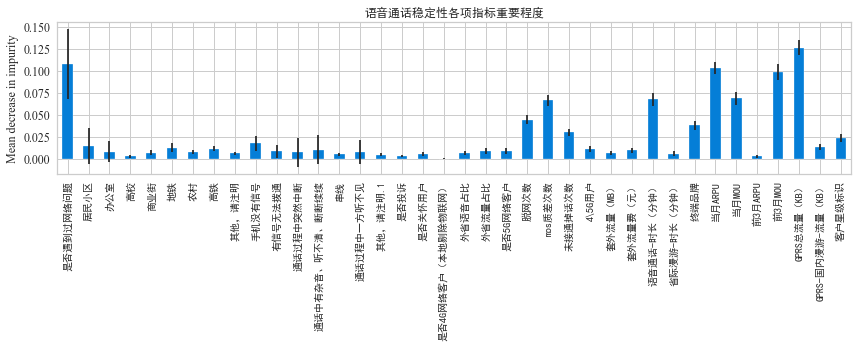

In [120]:
std = np.std([i.feature_importances_ for i in RandomForestFourth.estimators_], axis=0)
importances = DecisionTreeFourth.feature_importances_
feat_with_importance = pd.Series(importances, XdataOneFourth.columns)
fig, ax = plt.subplots(figsize=(12,5))
feat_with_importance.plot.bar(yerr=std, ax=ax, color=(5/255,126/255,215/255))
ax.set_title("语音通话稳定性各项指标重要程度")
ax.set_ylabel("Mean decrease in impurity",font='Times New Roman')
plt.yticks(font='Times New Roman')
plt.tight_layout()
plt.savefig("figuresOne\\[附件1]语音通话稳定性各项指标重要程度.pdf")

In [121]:
feat_with_importance

是否遇到过网络问题            0.107965
居民小区                 0.014763
办公室                  0.008536
高校                   0.003330
商业街                  0.007111
地铁                   0.012867
农村                   0.007586
高铁                   0.011751
其他，请注明               0.006533
手机没有信号               0.017686
有信号无法拨通              0.008784
通话过程中突然中断            0.007474
通话中有杂音、听不清、断断续续      0.010550
串线                   0.005684
通话过程中一方听不见           0.008475
其他，请注明.1             0.004754
是否投诉                 0.003229
是否关怀用户               0.005899
是否4G网络客户（本地剔除物联网）    0.000445
外省语音占比               0.006595
外省流量占比               0.009425
是否5G网络客户             0.009134
脱网次数                 0.044448
mos质差次数              0.066957
未接通掉话次数              0.030170
4\5G用户               0.011902
套外流量（MB）             0.006964
套外流量费（元）             0.010165
语音通话-时长（分钟）          0.067969
省际漫游-时长（分钟）          0.006033
终端品牌                 0.038205
当月ARPU               0.103238
当月MOU                0.068886
前3月ARPU   

#### XGBoost

In [122]:
from xgboost import XGBClassifier

XGBFourth = XGBClassifier(learning_rate=0.02,
                          n_estimators=14,
                          max_depth=6,
                          min_child_weight=1,
                          gamma=0.05,
                          subsample=1,
                          colsample_btree=1,
                          scale_pos_weight=1,
                          random_state=2022,
                          slient=0)
XGBFourth.fit(XdataOneFourth_train, ydataOneFourth_train)
XGBFourth_score = XGBFourth.score(XdataOneFourth_test, ydataOneFourth_test)
XGBFourth_score

[17:32:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_btree", "scale_pos_weight", "slient" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




0.5184162062615101

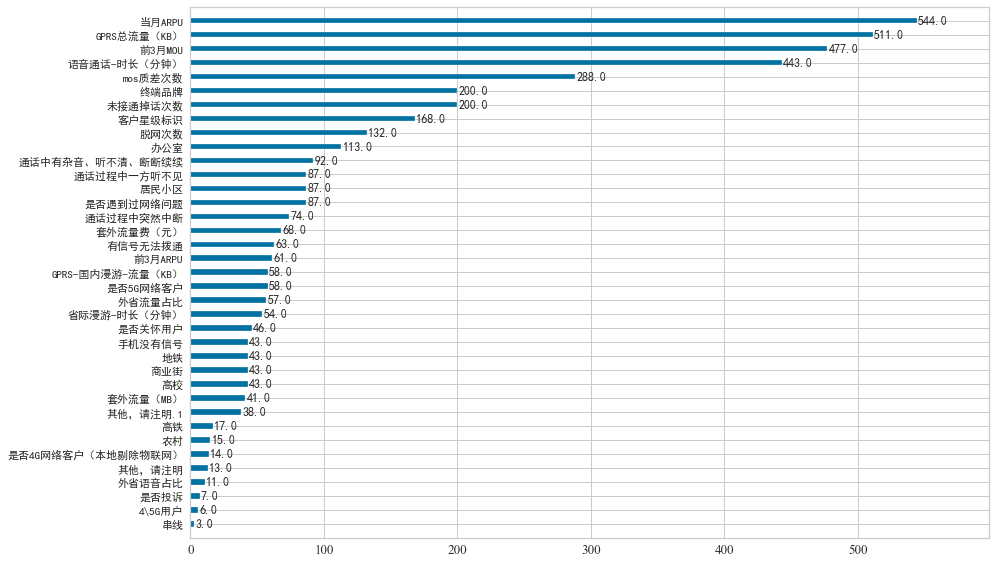

In [123]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(14,8))
plot_importance(XGBFourth, height=0.4, ax=ax)
plt.xticks(fontsize=13, font='Times New Roman')
plt.yticks(fontsize=11)
ax.set_title("")
ax.set_ylabel("")
ax.set_xlabel("")
plt.tight_layout()
plt.savefig('figuresOne\\[附件1]语音通话稳定性各项指标重要程度（XGBoost,F-score）.pdf')

#### KNN

In [124]:
from sklearn.neighbors import KNeighborsClassifier

KNNFourth = KNeighborsClassifier()
KNNFourth.fit(XdataOneFourth_train, ydataOneFourth_train)
KNNFourth_score = KNNFourth.score(XdataOneFourth_test, ydataOneFourth_test)
KNNFourth_score

0.4677716390423573

In [125]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

KNN_turing_param_grid = [{'weights':['uniform'],
                          'n_neighbors':[k for k in range(35,45)]},
                         {'weights':['distance'],
                          'n_neighbors':[k for k in range(35,45)],
                          'p':[p for p in range(1,5)]}]
KNN_turing = KNeighborsClassifier()
KNN_turing_grid_search = GridSearchCV(KNN_turing,
                                      param_grid = KNN_turing_param_grid,
                                      n_jobs = -1,
                                      verbose = 2)
KNN_turing_grid_search.fit(XdataOneFourth_train, ydataOneFourth_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   34.6s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'n_neighbors': [35, 36, 37, 38, 39, 40, 41, 42, 43,
                                          44],
                          'weights': ['uniform']},
                         {'n_neighbors': [35, 36, 37, 38, 39, 40, 41, 42, 43,
                                          44],
                          'p': [1, 2, 3, 4], 'weights': ['distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [126]:
KNN_turing_grid_search.best_score_

0.5253334252517593

In [127]:
KNN_turing_grid_search.best_params_

{'n_neighbors': 44, 'p': 1, 'weights': 'distance'}

In [128]:
KNNFourth_new = KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                     metric='minkowski',
                                     n_jobs=-1,
                                     n_neighbors=43, p=1,
                                     weights='distance')
KNNFourth_new.fit(XdataOneFourth_train, ydataOneFourth_train)
KNNFourth_new_score = KNNFourth_new.score(XdataOneFourth_test, ydataOneFourth_test)
KNNFourth_new_score

0.5239410681399632

#### 支持向量机

In [129]:
from sklearn.svm import SVC

SVMFourth = SVC(random_state=2022)
SVMFourth.fit(XdataOneFourth_train, ydataOneFourth_train)
SVMFourth_score = SVMFourth.score(XdataOneFourth_test, ydataOneFourth_test)
SVMFourth_score

0.5267034990791897

#### lightgbm

In [130]:
from lightgbm import LGBMClassifier
LightgbmFourth = LGBMClassifier(learning_rate = 0.1,
                                lambda_l1=0.1,
                                lambda_l2=0.2,
                                max_depth=10,
                                objective='multiclass',
                                num_class=4,
                                random_state=2022)
LightgbmFourth.fit(XdataOneFourth_train, ydataOneFourth_train)
LightgbmFourth_score = LightgbmFourth.score(XdataOneFourth_test, ydataOneFourth_test)
LightgbmFourth_score

[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2


0.511049723756906

#### 逻辑回归

In [131]:
from sklearn.linear_model import LogisticRegression
LogisticRegressionFourth = LogisticRegression(multi_class="multinomial", solver="newton-cg", max_iter=2000)
LogisticRegressionFourth = LogisticRegressionFourth.fit(XdataOneFourth_train, ydataOneFourth_train)
LogisticRegressionFourth_score = LogisticRegressionFourth.score(XdataOneFourth_test, ydataOneFourth_test)
LogisticRegressionFourth_score

0.5285451197053407

In [132]:
print(f'模型四中RF平均绝对误差：'
      f'{mean_absolute_error(ydataOneFourth_test, RandomForestFourth.predict(XdataOneFourth_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型四中RF均方误差：'
      f'{mean_squared_error(ydataOneFourth_test, RandomForestFourth.predict(XdataOneFourth_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型四中XGBoost平均绝对误差：'
      f'{mean_absolute_error(ydataOneFourth_test, XGBFourth.predict(XdataOneFourth_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型四中XGBoost均方误差：'
      f'{mean_squared_error(ydataOneFourth_test, XGBFourth.predict(XdataOneFourth_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型四中KNN平均绝对误差：'
      f'{mean_absolute_error(ydataOneFourth_test, KNNFourth_new.predict(XdataOneFourth_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型四中KNN均方误差：'
      f'{mean_squared_error(ydataOneFourth_test, KNNFourth_new.predict(XdataOneFourth_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型四中SVM平均绝对误差：'
      f'{mean_absolute_error(ydataOneFourth_test, SVMFourth.predict(XdataOneFourth_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型四中SVM均方误差：'
      f'{mean_squared_error(ydataOneFourth_test, SVMFourth.predict(XdataOneFourth_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型四中LightGBM平均绝对误差：'
      f'{mean_absolute_error(ydataOneFourth_test, LightgbmFourth.predict(XdataOneFourth_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型四中LightGBM均方误差：'
      f'{mean_squared_error(ydataOneFourth_test, LightgbmFourth.predict(XdataOneFourth_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型四中LR平均绝对误差：'
      f'{mean_absolute_error(ydataOneFourth_test, LogisticRegressionFourth.predict(XdataOneFourth_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型四中LR均方误差：'
      f'{mean_squared_error(ydataOneFourth_test, LogisticRegressionFourth.predict(XdataOneFourth_test), sample_weight=None, multioutput="uniform_average")}')

模型四中RF平均绝对误差：1.3996316758747698
模型四中RF均方误差：6.543278084714549
模型四中XGBoost平均绝对误差：1.4281767955801106
模型四中XGBoost均方误差：6.792817679558011
模型四中KNN平均绝对误差：1.416206261510129
模型四中KNN均方误差：6.738489871086556
模型四中SVM平均绝对误差：1.4677716390423572
模型四中SVM均方误差：7.265193370165746
模型四中LightGBM平均绝对误差：1.3517495395948436
模型四中LightGBM均方误差：6.14548802946593
模型四中LR平均绝对误差：1.3922651933701657
模型四中LR均方误差：6.572744014732965


#### 集成学习

In [133]:
from mlxtend.classifier import StackingCVClassifier
FourthModel = StackingCVClassifier(classifiers=[RandomForestFourth,LightgbmFourth,KNNFourth_new,LogisticRegressionFourth,SVMFourth], meta_classifier=XGBClassifier(random_state=2022), random_state=2022, cv=5)
FourthModel.fit(XdataOneFourth_train, ydataOneFourth_train)
FourthModel_score = FourthModel.score(XdataOneFourth_test, ydataOneFourth_test)
FourthModel_score

[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ign

0.5211786372007366

In [134]:
print(f'模型四平均绝对误差：'
      f'{mean_absolute_error(ydataOneFourth_test, FourthModel.predict(XdataOneFourth_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型四均方误差：'
      f'{mean_squared_error(ydataOneFourth_test, FourthModel.predict(XdataOneFourth_test), sample_weight=None, multioutput="uniform_average")}')

模型四平均绝对误差：1.3913443830570902
模型四均方误差：6.374769797421731


## 预测附件3四项评分

In [135]:
dataThree=pd.read_excel("附件3语音业务用户满意度预测数据.xlsx",sheet_name='语音')
dataThree

,用户id,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,农村,高铁,其他，请注明,...,当月ARPU,当月MOU,前3月ARPU,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,客户星级标识,是否不限量套餐到达用户
0,1,2,-1,-1,-1,-1,-1,-1,-1,-1,...,45.37,161,23.6,139,0.000000,14360274,0,否,一星,否
1,2,1,1,2,-1,-1,-1,-1,-1,-1,...,60.00,270,60.0,102,0.000000,9585266,0,否,三星,是
2,3,2,-1,-1,-1,-1,-1,-1,-1,-1,...,89.00,662,89.0,80,0.000000,6545659,0,否,三星,是
3,4,1,1,-1,-1,-1,-1,-1,-1,-1,...,70.00,645,69.1,333,0.000000,8266166,0,否,三星,否
4,5,1,1,-1,-1,-1,-1,-1,-1,-1,...,56.00,496,56.0,258,0.000000,13254086,0,是,三星,是
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2594,2595,1,-1,-1,-1,-1,-1,-1,7,-1,...,47.00,110,197.0,42,0.000000,34089161,0,否,三星,否
2595,2596,2,-1,-1,-1,-1,-1,-1,-1,-1,...,57.00,238,77.0,157,0.000000,4355664,0,否,三星,否
2596,2597,2,-1,-1,-1,-1,-1,-1,-1,-1,...,8.10,202,8.0,194,0.000000,27678375,0,是,三星,否
2597,2598,1,-1,-1,-1,-1,-1,6,7,-1,...,58.20,148,58.3,66,0.061913,5410723,334996,否,三星,否


### 附件格式统一

In [136]:
dataThree.drop(['用户id',
                '用户描述',
                '用户描述.1',
                '性别',
                '终端品牌类型',
                '是否不限量套餐到达用户'], axis=1, inplace=True)

In [137]:
dataThree

,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,农村,高铁,其他，请注明,手机没有信号,...,终端品牌,当月ARPU,当月MOU,前3月ARPU,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,客户星级标识
0,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,华为,45.37,161,23.6,139,0.000000,14360274,0,否,一星
1,1,1,2,-1,-1,-1,-1,-1,-1,-1,...,华为,60.00,270,60.0,102,0.000000,9585266,0,否,三星
2,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,苹果,89.00,662,89.0,80,0.000000,6545659,0,否,三星
3,1,1,-1,-1,-1,-1,-1,-1,-1,-1,...,苹果,70.00,645,69.1,333,0.000000,8266166,0,否,三星
4,1,1,-1,-1,-1,-1,-1,-1,-1,-1,...,华为,56.00,496,56.0,258,0.000000,13254086,0,是,三星
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2594,1,-1,-1,-1,-1,-1,-1,7,-1,1,...,华为,47.00,110,197.0,42,0.000000,34089161,0,否,三星
2595,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,苹果,57.00,238,77.0,157,0.000000,4355664,0,否,三星
2596,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,苹果,8.10,202,8.0,194,0.000000,27678375,0,是,三星
2597,1,-1,-1,-1,-1,-1,6,7,-1,-1,...,华为,58.20,148,58.3,66,0.061913,5410723,334996,否,三星


In [138]:
dataThree.isnull().sum()

是否遇到过网络问题            0
居民小区                 0
办公室                  0
高校                   0
商业街                  0
地铁                   0
农村                   0
高铁                   0
其他，请注明               0
手机没有信号               0
有信号无法拨通              0
通话过程中突然中断            0
通话中有杂音、听不清、断断续续      0
串线                   0
通话过程中一方听不见           0
其他，请注明.1             0
脱网次数                 0
mos质差次数              0
未接通掉话次数              0
是否投诉                 0
4\5G用户               0
是否关怀用户               0
套外流量（MB）             0
是否4G网络客户（本地剔除物联网）    0
套外流量费（元）             0
外省语音占比               0
语音通话-时长（分钟）          0
省际漫游-时长（分钟）          0
终端品牌                 0
当月ARPU               0
当月MOU                0
前3月ARPU              0
前3月MOU               0
外省流量占比               0
GPRS总流量（KB）          0
GPRS-国内漫游-流量（KB）     0
是否5G网络客户             0
客户星级标识               0
dtype: int64

In [139]:
dataThree["外省流量占比"] = dataThree["外省流量占比"].astype(str).replace('%','')
dataThree["外省语音占比"] = dataThree["外省语音占比"].astype(str).replace('%','')
dataThree

,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,农村,高铁,其他，请注明,手机没有信号,...,终端品牌,当月ARPU,当月MOU,前3月ARPU,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,客户星级标识
0,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,华为,45.37,161,23.6,139,0.0,14360274,0,否,一星
1,1,1,2,-1,-1,-1,-1,-1,-1,-1,...,华为,60.00,270,60.0,102,0.0,9585266,0,否,三星
2,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,苹果,89.00,662,89.0,80,0.0,6545659,0,否,三星
3,1,1,-1,-1,-1,-1,-1,-1,-1,-1,...,苹果,70.00,645,69.1,333,0.0,8266166,0,否,三星
4,1,1,-1,-1,-1,-1,-1,-1,-1,-1,...,华为,56.00,496,56.0,258,0.0,13254086,0,是,三星
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2594,1,-1,-1,-1,-1,-1,-1,7,-1,1,...,华为,47.00,110,197.0,42,0.0,34089161,0,否,三星
2595,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,苹果,57.00,238,77.0,157,0.0,4355664,0,否,三星
2596,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,苹果,8.10,202,8.0,194,0.0,27678375,0,是,三星
2597,1,-1,-1,-1,-1,-1,6,7,-1,-1,...,华为,58.20,148,58.3,66,0.0619133524299802,5410723,334996,否,三星


In [140]:
dataThree.replace({"是否遇到过网络问题":{2:0},
                   "居民小区":{-1:0},
                   "办公室":{-1:0,2:1},
                   "高校":{-1:0,3:1},
                   "商业街":{-1:0,4:1},
                   "地铁":{-1:0,5:1},
                   "农村":{-1:0,6:1},
                   "高铁":{-1:0,7:1},
                   "其他，请注明":{-1:0,98:1},
                   "手机没有信号":{-1:0},
                   "有信号无法拨通":{-1:0,2:1},
                   "通话过程中突然中断":{-1:0,3:1},
                   "通话中有杂音、听不清、断断续续":{-1:0,4:1},
                   "串线":{-1:0,5:1},
                   "通话过程中一方听不见":{-1:0,6:1},
                   "其他，请注明.1":{-1:0,98:1},
                   "是否投诉":{'是':1,'否':0},
                   "是否关怀用户":{'是':1,'否':0},
                   "是否4G网络客户（本地剔除物联网）":{'是':1,"否":0},
                   "是否5G网络客户":{'是':1,"否":0},
                   "客户星级标识":{'未评级':0,'准星':1,'一星':2,'二星':3,'三星':4,'银卡':5,'金卡':6,'白金卡':7,'钻石卡':8},
                   "终端品牌":{'苹果':22,'华为':11,'小米科技':14,
                            '步步高':18,'欧珀':17,'三星':4,
                            'realme':1,'0':0,'万普拉斯':3,
                            '锤子':24,'万普':8,'中邮通信':21,
                            '索尼爱立信':6,'亿城':6,'宇龙':6,
                            '中国移动':7,'中兴':10,'黑鲨':25,
                            '海信':16,'摩托罗拉':9,'诺基亚':12,
                            '奇酷':13}
                   }, inplace=True)
dataThree

,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,农村,高铁,其他，请注明,手机没有信号,...,终端品牌,当月ARPU,当月MOU,前3月ARPU,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,客户星级标识
0,0,0,0,0,0,0,0,0,0,0,...,11,45.37,161,23.6,139,0.0,14360274,0,0,2
1,1,1,1,0,0,0,0,0,0,0,...,11,60.00,270,60.0,102,0.0,9585266,0,0,4
2,0,0,0,0,0,0,0,0,0,0,...,22,89.00,662,89.0,80,0.0,6545659,0,0,4
3,1,1,0,0,0,0,0,0,0,0,...,22,70.00,645,69.1,333,0.0,8266166,0,0,4
4,1,1,0,0,0,0,0,0,0,0,...,11,56.00,496,56.0,258,0.0,13254086,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2594,1,0,0,0,0,0,0,1,0,1,...,11,47.00,110,197.0,42,0.0,34089161,0,0,4
2595,0,0,0,0,0,0,0,0,0,0,...,22,57.00,238,77.0,157,0.0,4355664,0,0,4
2596,0,0,0,0,0,0,0,0,0,0,...,22,8.10,202,8.0,194,0.0,27678375,0,1,4
2597,1,0,0,0,0,0,1,1,0,0,...,11,58.20,148,58.3,66,0.0619133524299802,5410723,334996,0,4


In [141]:
dataThree['外省语音占比'] = dataThree['外省语音占比'].astype('float64')
dataThree['外省流量占比'] = dataThree['外省流量占比'].astype('float64')
dataThree['是否4G网络客户（本地剔除物联网）'] = dataThree['是否4G网络客户（本地剔除物联网）'].astype('int64')
dataThree['4\\5G用户'] = dataThree['4\\5G用户'].astype(str)
dataThree

,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,农村,高铁,其他，请注明,手机没有信号,...,终端品牌,当月ARPU,当月MOU,前3月ARPU,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,客户星级标识
0,0,0,0,0,0,0,0,0,0,0,...,11,45.37,161,23.6,139,0.000000,14360274,0,0,2
1,1,1,1,0,0,0,0,0,0,0,...,11,60.00,270,60.0,102,0.000000,9585266,0,0,4
2,0,0,0,0,0,0,0,0,0,0,...,22,89.00,662,89.0,80,0.000000,6545659,0,0,4
3,1,1,0,0,0,0,0,0,0,0,...,22,70.00,645,69.1,333,0.000000,8266166,0,0,4
4,1,1,0,0,0,0,0,0,0,0,...,11,56.00,496,56.0,258,0.000000,13254086,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2594,1,0,0,0,0,0,0,1,0,1,...,11,47.00,110,197.0,42,0.000000,34089161,0,0,4
2595,0,0,0,0,0,0,0,0,0,0,...,22,57.00,238,77.0,157,0.000000,4355664,0,0,4
2596,0,0,0,0,0,0,0,0,0,0,...,22,8.10,202,8.0,194,0.000000,27678375,0,1,4
2597,1,0,0,0,0,0,1,1,0,0,...,11,58.20,148,58.3,66,0.061913,5410723,334996,0,4


In [142]:
le=sp.LabelEncoder()

FourFiveUser=le.fit_transform(dataThree["4\\5G用户"])
dataThree["4\\5G用户"]=pd.DataFrame(FourFiveUser)
dataThree

,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,农村,高铁,其他，请注明,手机没有信号,...,终端品牌,当月ARPU,当月MOU,前3月ARPU,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,客户星级标识
0,0,0,0,0,0,0,0,0,0,0,...,11,45.37,161,23.6,139,0.000000,14360274,0,0,2
1,1,1,1,0,0,0,0,0,0,0,...,11,60.00,270,60.0,102,0.000000,9585266,0,0,4
2,0,0,0,0,0,0,0,0,0,0,...,22,89.00,662,89.0,80,0.000000,6545659,0,0,4
3,1,1,0,0,0,0,0,0,0,0,...,22,70.00,645,69.1,333,0.000000,8266166,0,0,4
4,1,1,0,0,0,0,0,0,0,0,...,11,56.00,496,56.0,258,0.000000,13254086,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2594,1,0,0,0,0,0,0,1,0,1,...,11,47.00,110,197.0,42,0.000000,34089161,0,0,4
2595,0,0,0,0,0,0,0,0,0,0,...,22,57.00,238,77.0,157,0.000000,4355664,0,0,4
2596,0,0,0,0,0,0,0,0,0,0,...,22,8.10,202,8.0,194,0.000000,27678375,0,1,4
2597,1,0,0,0,0,0,1,1,0,0,...,11,58.20,148,58.3,66,0.061913,5410723,334996,0,4


In [143]:
dataThree['是否5G网络客户'] = dataThree['是否5G网络客户'].astype('int64')
dataThree['客户星级标识'] = dataThree['客户星级标识'].astype('int64')
dataThree['终端品牌'] = dataThree['终端品牌'].astype('int32')
dataThree

,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,农村,高铁,其他，请注明,手机没有信号,...,终端品牌,当月ARPU,当月MOU,前3月ARPU,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,客户星级标识
0,0,0,0,0,0,0,0,0,0,0,...,11,45.37,161,23.6,139,0.000000,14360274,0,0,2
1,1,1,1,0,0,0,0,0,0,0,...,11,60.00,270,60.0,102,0.000000,9585266,0,0,4
2,0,0,0,0,0,0,0,0,0,0,...,22,89.00,662,89.0,80,0.000000,6545659,0,0,4
3,1,1,0,0,0,0,0,0,0,0,...,22,70.00,645,69.1,333,0.000000,8266166,0,0,4
4,1,1,0,0,0,0,0,0,0,0,...,11,56.00,496,56.0,258,0.000000,13254086,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2594,1,0,0,0,0,0,0,1,0,1,...,11,47.00,110,197.0,42,0.000000,34089161,0,0,4
2595,0,0,0,0,0,0,0,0,0,0,...,22,57.00,238,77.0,157,0.000000,4355664,0,0,4
2596,0,0,0,0,0,0,0,0,0,0,...,22,8.10,202,8.0,194,0.000000,27678375,0,1,4
2597,1,0,0,0,0,0,1,1,0,0,...,11,58.20,148,58.3,66,0.061913,5410723,334996,0,4


In [144]:
dataThreeStandardTransform = dataThree[['脱网次数','mos质差次数','未接通掉话次数','4\\5G用户',
                                        '套外流量（MB）','套外流量费（元）','语音通话-时长（分钟）','省际漫游-时长（分钟）',
                                        '终端品牌','当月ARPU','当月MOU',
                                        '前3月ARPU','前3月MOU','GPRS总流量（KB）','GPRS-国内漫游-流量（KB）',
                                        '客户星级标识']]
dataThreeStandardTransformScaler = sp.StandardScaler()
dataThreeStandardTransformScaler = dataThreeStandardTransformScaler.fit(dataThreeStandardTransform)
dataThreeStandardTransform = dataThreeStandardTransformScaler.transform(dataThreeStandardTransform)
dataThreeStandardTransform = pd.DataFrame(dataThreeStandardTransform)
dataThreeStandardTransform.columns = ['脱网次数','mos质差次数','未接通掉话次数','4\\5G用户',
                                      '套外流量（MB）','套外流量费（元）','语音通话-时长（分钟）','省际漫游-时长（分钟）',
                                      '终端品牌','当月ARPU','当月MOU',
                                      '前3月ARPU','前3月MOU','GPRS总流量（KB）','GPRS-国内漫游-流量（KB）',
                                      '客户星级标识']
dataThreeStandardTransform

,脱网次数,mos质差次数,未接通掉话次数,4\5G用户,套外流量（MB）,套外流量费（元）,语音通话-时长（分钟）,省际漫游-时长（分钟）,终端品牌,当月ARPU,当月MOU,前3月ARPU,前3月MOU,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,客户星级标识
0,-0.509660,-0.716592,-0.373578,-0.743848,-0.076033,0.026766,-0.603708,-0.131605,-0.901439,-0.592705,-0.603708,-0.885519,-0.586506,-0.257333,-0.118890,-2.261622
1,-0.543100,0.134058,-0.211676,-0.743848,-0.092908,-0.142870,-0.393645,-0.131605,-0.901439,-0.386275,-0.393645,-0.351281,-0.677327,-0.473804,-0.118890,-0.177241
2,-0.108386,1.234899,0.274032,-0.743848,-0.092908,-0.142870,0.361809,-0.131605,1.192082,0.022917,0.361809,0.074349,-0.731329,-0.611602,-0.118890,-0.177241
3,-0.275583,-0.066095,-0.049773,-0.743848,-0.092908,-0.142870,0.329047,-0.131605,1.192082,-0.245174,0.329047,-0.217721,-0.110311,-0.533604,-0.118890,-0.177241
4,0.192570,-0.666554,-0.049773,1.284758,-0.092908,-0.142870,0.041897,-0.131605,-0.901439,-0.442715,0.041897,-0.409988,-0.294407,-0.307481,-0.118890,-0.177241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2594,3.101810,-0.666554,-0.373578,-0.743848,-0.092908,-0.142870,-0.701994,-0.131605,-0.901439,-0.569706,-0.701994,1.659451,-0.824604,0.637059,-0.118890,-0.177241
2595,-0.008067,-0.266248,-0.049773,-0.743848,-0.092908,-0.142870,-0.455315,-0.131605,1.192082,-0.428605,-0.455315,-0.101774,-0.542323,-0.710884,-0.118890,-0.177241
2596,-0.442781,-0.616516,-0.373578,1.284758,-0.092908,-0.142870,-0.524693,-0.131605,1.192082,-1.118588,-0.524693,-1.114478,-0.451503,0.346431,-0.118890,-0.177241
2597,-0.208704,-0.566477,-0.211676,-0.743848,-0.092908,-0.142870,-0.628761,-0.131605,-0.901439,-0.411673,-0.628761,-0.376231,-0.765693,-0.663054,0.208773,-0.177241


In [145]:
dataThreeLeave=dataThree.loc[:,~dataThree.columns.isin(['脱网次数','mos质差次数','未接通掉话次数','4\\5G用户',
                                                        '套外流量（MB）','套外流量费（元）','语音通话-时长（分钟）','省际漫游-时长（分钟）',
                                                        '终端品牌','当月ARPU','当月MOU',
                                                        '前3月ARPU','前3月MOU','GPRS总流量（KB）','GPRS-国内漫游-流量（KB）',
                                                        '客户星级标识'])]
dataThreeNewStandard=pd.concat([dataThreeLeave, dataThreeStandardTransform],axis=1)
dataThreeNewStandard.columns=['是否遇到过网络问题','居民小区','办公室','高校',
                              '商业街','地铁','农村','高铁',
                              '其他，请注明','手机没有信号','有信号无法拨通','通话过程中突然中断',
                              '通话中有杂音、听不清、断断续续','串线','通话过程中一方听不见','其他，请注明.1',
                              '是否投诉','是否关怀用户','是否4G网络客户（本地剔除物联网）','外省语音占比',
                              '外省流量占比','是否5G网络客户','脱网次数','mos质差次数',
                              '未接通掉话次数','4\\5G用户','套外流量（MB）','套外流量费（元）',
                              '语音通话-时长（分钟）','省际漫游-时长（分钟）','终端品牌',
                              '当月ARPU','当月MOU','前3月ARPU','前3月MOU',
                              'GPRS总流量（KB）','GPRS-国内漫游-流量（KB）','客户星级标识']
dataThreeNewStandard

,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,农村,高铁,其他，请注明,手机没有信号,...,语音通话-时长（分钟）,省际漫游-时长（分钟）,终端品牌,当月ARPU,当月MOU,前3月ARPU,前3月MOU,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,客户星级标识
0,0,0,0,0,0,0,0,0,0,0,...,-0.603708,-0.131605,-0.901439,-0.592705,-0.603708,-0.885519,-0.586506,-0.257333,-0.118890,-2.261622
1,1,1,1,0,0,0,0,0,0,0,...,-0.393645,-0.131605,-0.901439,-0.386275,-0.393645,-0.351281,-0.677327,-0.473804,-0.118890,-0.177241
2,0,0,0,0,0,0,0,0,0,0,...,0.361809,-0.131605,1.192082,0.022917,0.361809,0.074349,-0.731329,-0.611602,-0.118890,-0.177241
3,1,1,0,0,0,0,0,0,0,0,...,0.329047,-0.131605,1.192082,-0.245174,0.329047,-0.217721,-0.110311,-0.533604,-0.118890,-0.177241
4,1,1,0,0,0,0,0,0,0,0,...,0.041897,-0.131605,-0.901439,-0.442715,0.041897,-0.409988,-0.294407,-0.307481,-0.118890,-0.177241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2594,1,0,0,0,0,0,0,1,0,1,...,-0.701994,-0.131605,-0.901439,-0.569706,-0.701994,1.659451,-0.824604,0.637059,-0.118890,-0.177241
2595,0,0,0,0,0,0,0,0,0,0,...,-0.455315,-0.131605,1.192082,-0.428605,-0.455315,-0.101774,-0.542323,-0.710884,-0.118890,-0.177241
2596,0,0,0,0,0,0,0,0,0,0,...,-0.524693,-0.131605,1.192082,-1.118588,-0.524693,-1.114478,-0.451503,0.346431,-0.118890,-0.177241
2597,1,0,0,0,0,0,1,1,0,0,...,-0.628761,-0.131605,-0.901439,-0.411673,-0.628761,-0.376231,-0.765693,-0.663054,0.208773,-0.177241


In [146]:
dataOneNewStandard

,语音通话整体满意度,网络覆盖与信号强度,语音通话清晰度,语音通话稳定性,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,...,语音通话-时长（分钟）,省际漫游-时长（分钟）,终端品牌,当月ARPU,当月MOU,前3月ARPU,前3月MOU,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,客户星级标识
0,9,5,5,5,1,0,1,0,0,0,...,0.274482,3.878727,1.103607,3.829143,0.274482,-0.098405,0.026038,-0.296526,1.238270,0.902508
1,1,0,0,0,1,1,1,0,1,0,...,0.666940,5.498227,-0.974352,0.383475,0.666940,-0.098405,0.026038,-0.019761,2.724694,0.902508
2,9,6,6,6,1,0,0,0,0,0,...,-0.215331,1.857491,-0.974352,-0.542498,-0.215331,-0.098405,-0.079836,-0.365445,0.868126,-0.153271
3,5,6,6,5,1,1,1,0,0,0,...,-0.493702,0.708776,1.103607,-0.527892,-0.493702,-0.098405,-0.256820,-0.391507,0.728157,-0.153271
4,4,4,3,2,1,0,1,0,0,1,...,0.492007,4.776357,1.103607,0.773434,0.492007,-0.098405,1.152728,-0.438169,0.477548,0.902508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5423,9,9,9,7,1,0,1,0,0,0,...,-0.259444,-0.163745,1.103607,-0.411050,-0.259444,-0.098405,-0.226796,-0.043555,-0.161320,-1.209050
5424,9,9,9,9,1,1,1,0,0,0,...,1.237374,-0.163745,1.103607,1.383787,1.237374,-0.098405,-0.500172,-0.537761,-0.161320,-0.153271
5425,5,4,6,3,1,0,0,0,1,0,...,-0.530210,-0.163745,-0.974352,0.070922,-0.530210,-0.098405,-0.495432,-0.346918,-0.161320,0.902508
5426,8,8,9,8,1,0,0,0,0,1,...,-0.432856,-0.163745,-0.407636,-0.966050,-0.432856,-0.098405,-0.602886,-0.500325,-0.161320,-0.153271


### 预测语音业务评分
需要注意到在所有预测结果上加上1，由于之前将评分编码为[0,9]，这里需要再映射回[1,10]

In [147]:
Xpre=dataThreeNewStandard

#### 语音通话整体满意度

In [148]:
FirstPre=FirstModel.predict(Xpre)
FirstPre

array([9, 9, 9, ..., 9, 9, 9], dtype=int64)

#### 网络覆盖与信号强度

In [149]:
SecondPre=SecondModel.predict(Xpre)
SecondPre

array([9, 9, 9, ..., 9, 9, 9], dtype=int64)

#### 语音通话清晰度

In [150]:
ThirdPre=ThirdModel.predict(Xpre)
ThirdPre

array([9, 6, 9, ..., 9, 9, 9], dtype=int64)

#### 语音通话稳定性

In [151]:
FourthPre=FourthModel.predict(Xpre)
FourthPre

array([9, 9, 9, ..., 9, 9, 9], dtype=int64)

## 模型效果分析

### 混淆矩阵热力图

#### 模型一

<AxesSubplot:title={'center':'StackingCVClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

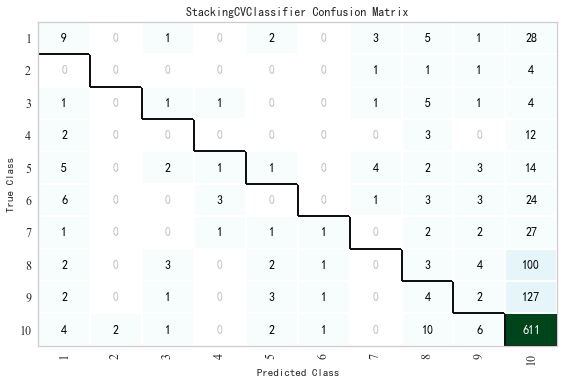

In [152]:
from yellowbrick.classifier import ConfusionMatrix
classes=['1','2','3','4','5','6','7','8','9','10']
confusion_matrix = ConfusionMatrix(FirstModel, classes=classes, cmap='BuGn')
confusion_matrix.fit(XdataOneFirst_train, ydataOneFirst_train)
confusion_matrix.score(XdataOneFirst_test, ydataOneFirst_test)
plt.xticks(font='Times New Roman')
plt.yticks(font='Times New Roman')
confusion_matrix.show(outpath='figuresOne\\[附件1]模型一混淆矩阵热力图.pdf')

#### 模型二

<AxesSubplot:title={'center':'StackingCVClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

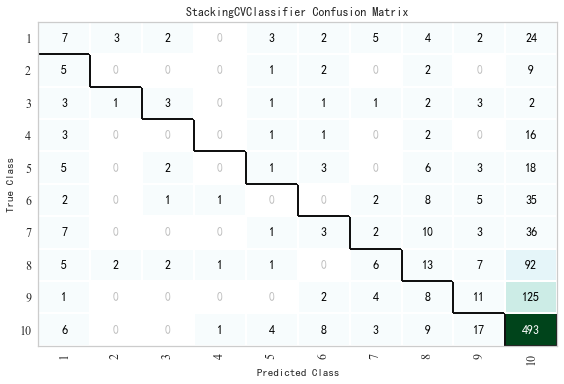

In [153]:
from yellowbrick.classifier import ConfusionMatrix
classes=['1','2','3','4','5','6','7','8','9','10']
confusion_matrix = ConfusionMatrix(SecondModel, classes=classes, cmap='BuGn')
confusion_matrix.fit(XdataOneSecond_train, ydataOneSecond_train)
confusion_matrix.score(XdataOneSecond_test, ydataOneSecond_test)
plt.xticks(font='Times New Roman')
plt.yticks(font='Times New Roman')
confusion_matrix.show(outpath='figuresOne\\[附件1]模型二混淆矩阵热力图.pdf')

#### 模型三

<AxesSubplot:title={'center':'StackingCVClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

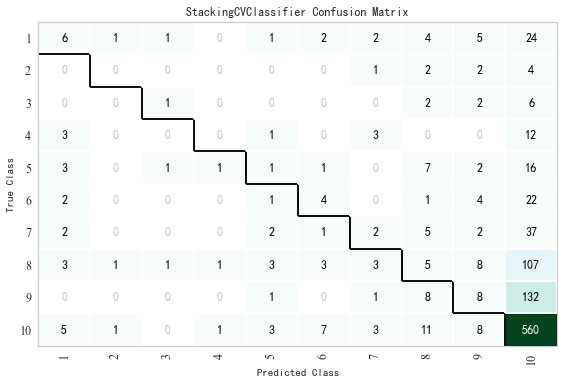

In [154]:
from yellowbrick.classifier import ConfusionMatrix
classes=['1','2','3','4','5','6','7','8','9','10']
confusion_matrix = ConfusionMatrix(ThirdModel, classes=classes, cmap='BuGn')
confusion_matrix.fit(XdataOneThird_train, ydataOneThird_train)
confusion_matrix.score(XdataOneThird_test, ydataOneThird_test)
plt.xticks(font='Times New Roman')
plt.yticks(font='Times New Roman')
confusion_matrix.show(outpath='figuresOne\\[附件1]模型三混淆矩阵热力图.pdf')

#### 模型四

<AxesSubplot:title={'center':'StackingCVClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

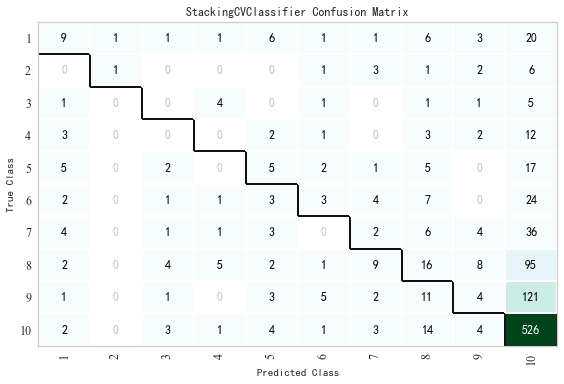

In [155]:
from yellowbrick.classifier import ConfusionMatrix
classes=['1','2','3','4','5','6','7','8','9','10']
confusion_matrix = ConfusionMatrix(FourthModel, classes=classes, cmap='BuGn')
confusion_matrix.fit(XdataOneFourth_train, ydataOneFourth_train)
confusion_matrix.score(XdataOneFourth_test, ydataOneFourth_test)
plt.xticks(font='Times New Roman')
plt.yticks(font='Times New Roman')
confusion_matrix.show(outpath='figuresOne\\[附件1]模型四混淆矩阵热力图.pdf')

### 分类报告

#### 模型一

<AxesSubplot:title={'center':'StackingCVClassifier Classification Report'}>

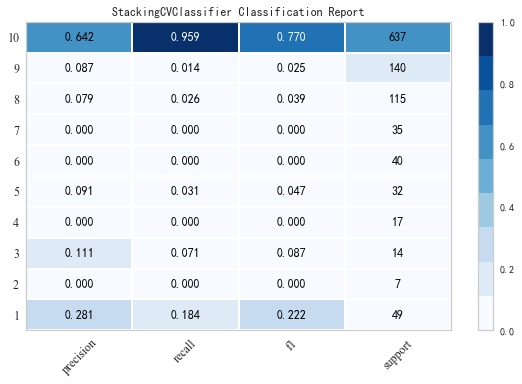

In [156]:
from yellowbrick.classifier import ClassificationReport
classes=['1','2','3','4','5','6','7','8','9','10']
visualizer = ClassificationReport(FirstModel, classes=classes, support=True, cmap='Blues')
visualizer.fit(XdataOneFirst_train, ydataOneFirst_train)
visualizer.score(XdataOneFirst_test, ydataOneFirst_test)
plt.xticks(font='Times New Roman')
plt.yticks(font='Times New Roman')
visualizer.show(outpath='figuresOne\\[附件1]模型一分类报告.pdf')

#### 模型二

<AxesSubplot:title={'center':'StackingCVClassifier Classification Report'}>

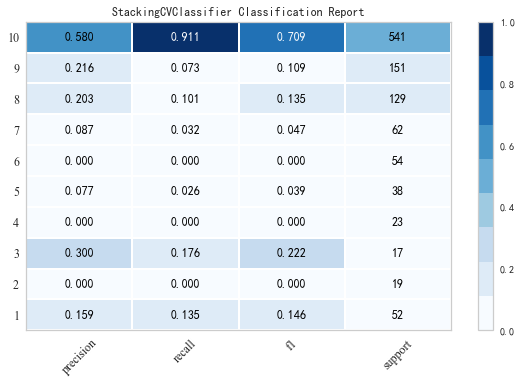

In [157]:
from yellowbrick.classifier import ClassificationReport
classes=['1','2','3','4','5','6','7','8','9','10']
visualizer = ClassificationReport(SecondModel, classes=classes, support=True, cmap='Blues')
visualizer.fit(XdataOneSecond_train, ydataOneSecond_train)
visualizer.score(XdataOneSecond_test, ydataOneSecond_test)
plt.xticks(font='Times New Roman')
plt.yticks(font='Times New Roman')
visualizer.show(outpath='figuresOne\\[附件1]模型二分类报告.pdf')

#### 模型三

<AxesSubplot:title={'center':'StackingCVClassifier Classification Report'}>

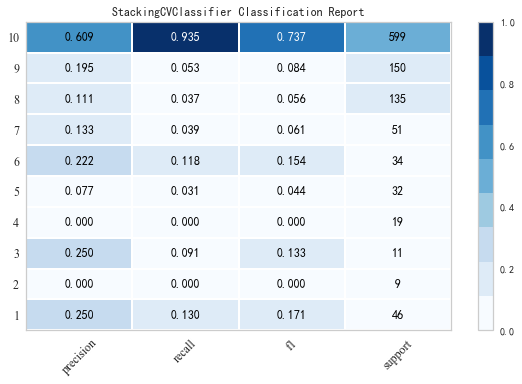

In [158]:
from yellowbrick.classifier import ClassificationReport
classes=['1','2','3','4','5','6','7','8','9','10']
visualizer = ClassificationReport(ThirdModel, classes=classes, support=True, cmap='Blues')
visualizer.fit(XdataOneThird_train, ydataOneThird_train)
visualizer.score(XdataOneThird_test, ydataOneThird_test)
plt.xticks(font='Times New Roman')
plt.yticks(font='Times New Roman')
visualizer.show(outpath='figuresOne\\[附件1]模型三分类报告.pdf')

#### 模型四

<AxesSubplot:title={'center':'StackingCVClassifier Classification Report'}>

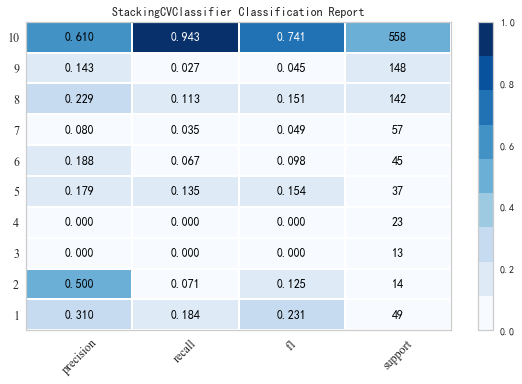

In [159]:
from yellowbrick.classifier import ClassificationReport
classes=['1','2','3','4','5','6','7','8','9','10']
visualizer = ClassificationReport(FourthModel, classes=classes, support=True, cmap='Blues')
visualizer.fit(XdataOneFourth_train, ydataOneFourth_train)
visualizer.score(XdataOneFourth_test, ydataOneFourth_test)
plt.xticks(font='Times New Roman')
plt.yticks(font='Times New Roman')
visualizer.show(outpath='figuresOne\\[附件1]模型四分类报告.pdf')

### ROC AUC曲线

#### 模型一

<AxesSubplot:title={'center':'ROC Curves for StackingCVClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

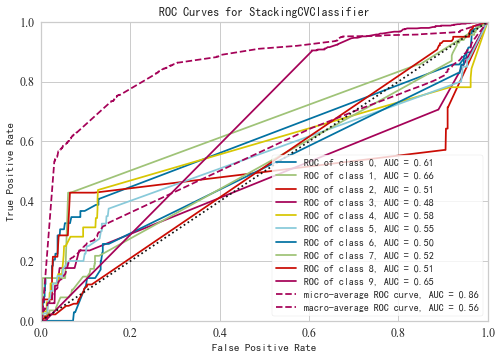

In [160]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(FirstModel)
visualizer.fit(XdataOneFirst_train, ydataOneFirst_train)
visualizer.score(XdataOneFirst_test, ydataOneFirst_test)
plt.xticks(font='Times New Roman')
plt.yticks(font='Times New Roman')
visualizer.show(outpath='figuresOne\\[附件1]模型一ROCAUC.pdf')

#### 模型二

<AxesSubplot:title={'center':'ROC Curves for StackingCVClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

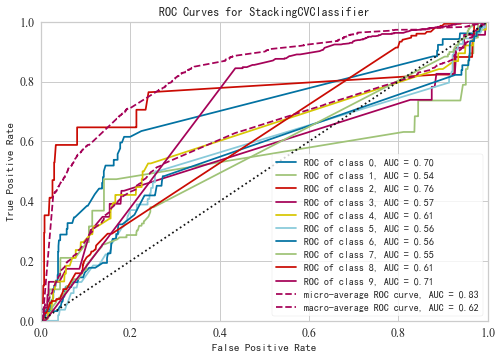

In [161]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(SecondModel)
visualizer.fit(XdataOneSecond_train, ydataOneSecond_train)
visualizer.score(XdataOneSecond_test, ydataOneSecond_test)
plt.xticks(font='Times New Roman')
plt.yticks(font='Times New Roman')
visualizer.show(outpath='figuresOne\\[附件1]模型二ROCAUC.pdf')

#### 模型三

<AxesSubplot:title={'center':'ROC Curves for StackingCVClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

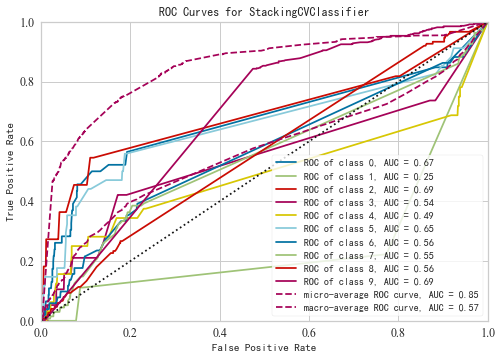

In [162]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(ThirdModel)
visualizer.fit(XdataOneThird_train, ydataOneThird_train)
visualizer.score(XdataOneThird_test, ydataOneThird_test)
plt.xticks(font='Times New Roman')
plt.yticks(font='Times New Roman')
visualizer.show(outpath='figuresOne\\[附件1]模型三ROCAUC.pdf')

#### 模型四

<AxesSubplot:title={'center':'ROC Curves for StackingCVClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

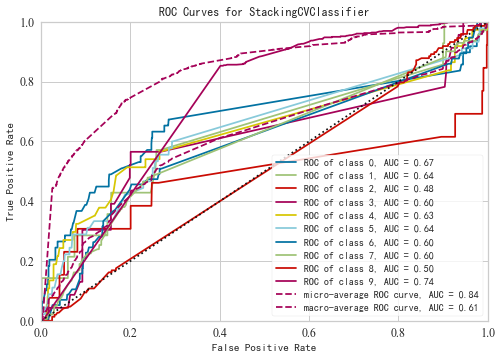

In [163]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(FourthModel)
visualizer.fit(XdataOneFourth_train, ydataOneFourth_train)
visualizer.score(XdataOneFourth_test, ydataOneFourth_test)
plt.xticks(font='Times New Roman')
plt.yticks(font='Times New Roman')
visualizer.show(outpath='figuresOne\\[附件1]模型四ROCAUC.pdf')

### 平均绝对误差，均方误差

#### 模型一

In [164]:
print(f'模型一平均绝对误差：'
      f'{mean_absolute_error(ydataOneFirst_test, FirstModel.predict(XdataOneFirst_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型一均方误差：'
      f'{mean_squared_error(ydataOneFirst_test, FirstModel.predict(XdataOneFirst_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型一中RF平均绝对误差：'
      f'{mean_absolute_error(ydataOneFirst_test, RandomForestFirst.predict(XdataOneFirst_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型一中RF均方误差：'
      f'{mean_squared_error(ydataOneFirst_test, RandomForestFirst.predict(XdataOneFirst_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型一中XGBoost平均绝对误差：'
      f'{mean_absolute_error(ydataOneFirst_test, XGBFirst.predict(XdataOneFirst_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型一中XGBoost均方误差：'
      f'{mean_squared_error(ydataOneFirst_test, XGBFirst.predict(XdataOneFirst_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型一中KNN平均绝对误差：'
      f'{mean_absolute_error(ydataOneFirst_test, KNNFirst_new.predict(XdataOneFirst_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型一中KNN均方误差：'
      f'{mean_squared_error(ydataOneFirst_test, KNNFirst_new.predict(XdataOneFirst_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型一中SVM平均绝对误差：'
      f'{mean_absolute_error(ydataOneFirst_test, SVMFirst.predict(XdataOneFirst_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型一中SVM均方误差：'
      f'{mean_squared_error(ydataOneFirst_test, SVMFirst.predict(XdataOneFirst_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型一中LightGBM平均绝对误差：'
      f'{mean_absolute_error(ydataOneFirst_test, LightgbmFirst.predict(XdataOneFirst_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型一中LightGBM均方误差：'
      f'{mean_squared_error(ydataOneFirst_test, LightgbmFirst.predict(XdataOneFirst_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型一中LR平均绝对误差：'
      f'{mean_absolute_error(ydataOneFirst_test, LogisticRegressionFirst.predict(XdataOneFirst_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型一中LR均方误差：'
      f'{mean_squared_error(ydataOneFirst_test, LogisticRegressionFirst.predict(XdataOneFirst_test), sample_weight=None, multioutput="uniform_average")}')

模型一平均绝对误差：1.2937384898710866
模型一均方误差：6.387661141804788
模型一中RF平均绝对误差：1.29097605893186
模型一中RF均方误差：6.537753222836096
模型一中XGBoost平均绝对误差：1.2320441988950277
模型一中XGBoost均方误差：6.033149171270718
模型一中KNN平均绝对误差：1.2679558011049723
模型一中KNN均方误差：6.505524861878453
模型一中SVM平均绝对误差：1.358195211786372
模型一中SVM均方误差：7.310313075506445
模型一中LightGBM平均绝对误差：1.236648250460405
模型一中LightGBM均方误差：5.8130755064456725
模型一中LR平均绝对误差：1.232965009208103
模型一中LR均方误差：6.023020257826888


#### 模型二

In [165]:
print(f'模型二平均绝对误差：'
      f'{mean_absolute_error(ydataOneSecond_test, SecondModel.predict(XdataOneSecond_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型二均方误差：'
      f'{mean_squared_error(ydataOneSecond_test, SecondModel.predict(XdataOneSecond_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型二中RF平均绝对误差：'
      f'{mean_absolute_error(ydataOneSecond_test, RandomForestSecond.predict(XdataOneSecond_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型二中RF均方误差：'
      f'{mean_squared_error(ydataOneSecond_test, RandomForestSecond.predict(XdataOneSecond_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型二中XGBoost平均绝对误差：'
      f'{mean_absolute_error(ydataOneSecond_test, XGBSecond.predict(XdataOneSecond_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型二中XGBoost均方误差：'
      f'{mean_squared_error(ydataOneSecond_test, XGBSecond.predict(XdataOneSecond_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型二中KNN平均绝对误差：'
      f'{mean_absolute_error(ydataOneSecond_test, KNNSecond_new.predict(XdataOneSecond_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型二中KNN均方误差：'
      f'{mean_squared_error(ydataOneSecond_test, KNNSecond_new.predict(XdataOneSecond_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型二中SVM平均绝对误差：'
      f'{mean_absolute_error(ydataOneSecond_test, SVMSecond.predict(XdataOneSecond_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型二中SVM均方误差：'
      f'{mean_squared_error(ydataOneSecond_test, SVMSecond.predict(XdataOneSecond_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型二中LightGBM平均绝对误差：'
      f'{mean_absolute_error(ydataOneSecond_test, LightgbmSecond.predict(XdataOneSecond_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型二中LightGBM均方误差：'
      f'{mean_squared_error(ydataOneSecond_test, LightgbmSecond.predict(XdataOneSecond_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型二中LR平均绝对误差：'
      f'{mean_absolute_error(ydataOneSecond_test, LogisticRegressionSecond.predict(XdataOneSecond_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型二中LR均方误差：'
      f'{mean_squared_error(ydataOneSecond_test, LogisticRegressionSecond.predict(XdataOneSecond_test), sample_weight=None, multioutput="uniform_average")}')

模型二平均绝对误差：1.5386740331491713
模型二均方误差：7.341620626151013
模型二中RF平均绝对误差：1.5303867403314917
模型二中RF均方误差：7.607734806629834
模型二中XGBoost平均绝对误差：1.492633517495396
模型二中XGBoost均方误差：7.056169429097606
模型二中KNN平均绝对误差：1.550644567219153
模型二中KNN均方误差：7.692449355432781
模型二中SVM平均绝对误差：1.594843462246777
模型二中SVM均方误差：8.057090239410682
模型二中LightGBM平均绝对误差：1.503683241252302
模型二中LightGBM均方误差：7.129834254143646
模型二中LR平均绝对误差：1.4797421731123388
模型二中LR均方误差：7.010128913443831


#### 模型三

In [166]:
print(f'模型三平均绝对误差：'
      f'{mean_absolute_error(ydataOneThird_test, ThirdModel.predict(XdataOneThird_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型三均方误差：'
      f'{mean_squared_error(ydataOneThird_test, ThirdModel.predict(XdataOneThird_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型三中RF平均绝对误差：'
      f'{mean_absolute_error(ydataOneThird_test, RandomForestThird.predict(XdataOneThird_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型三中RF均方误差：'
      f'{mean_squared_error(ydataOneThird_test, RandomForestThird.predict(XdataOneThird_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型三中XGBoost平均绝对误差：'
      f'{mean_absolute_error(ydataOneThird_test, XGBThird.predict(XdataOneThird_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型三中XGBoost均方误差：'
      f'{mean_squared_error(ydataOneThird_test, XGBThird.predict(XdataOneThird_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型三中KNN平均绝对误差：'
      f'{mean_absolute_error(ydataOneThird_test, KNNThird_new.predict(XdataOneThird_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型三中KNN均方误差：'
      f'{mean_squared_error(ydataOneThird_test, KNNThird_new.predict(XdataOneThird_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型三中SVM平均绝对误差：'
      f'{mean_absolute_error(ydataOneThird_test, SVMThird.predict(XdataOneThird_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型三中SVM均方误差：'
      f'{mean_squared_error(ydataOneThird_test, SVMThird.predict(XdataOneThird_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型三中LightGBM平均绝对误差：'
      f'{mean_absolute_error(ydataOneThird_test, LightgbmThird.predict(XdataOneThird_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型三中LightGBM均方误差：'
      f'{mean_squared_error(ydataOneThird_test, LightgbmThird.predict(XdataOneThird_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型三中LR平均绝对误差：'
      f'{mean_absolute_error(ydataOneThird_test, LogisticRegressionThird.predict(XdataOneThird_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型三中LR均方误差：'
      f'{mean_squared_error(ydataOneThird_test, LogisticRegressionThird.predict(XdataOneThird_test), sample_weight=None, multioutput="uniform_average")}')

模型三平均绝对误差：1.352670349907919
模型三均方误差：6.453959484346225
模型三中RF平均绝对误差：1.2863720073664826
模型三中RF均方误差：6.069060773480663
模型三中XGBoost平均绝对误差：1.3038674033149171
模型三中XGBoost均方误差：6.097605893186004
模型三中KNN平均绝对误差：1.3001841620626151
模型三中KNN均方误差：6.206261510128914
模型三中SVM平均绝对误差：1.3931860036832413
模型三中SVM均方误差：7.113259668508287
模型三中LightGBM平均绝对误差：1.2605893186003683
模型三中LightGBM均方误差：5.686003683241252
模型三中LR平均绝对误差：1.2845303867403315
模型三中LR均方误差：5.984346224677717


#### 模型四

In [167]:
print(f'模型四平均绝对误差：'
      f'{mean_absolute_error(ydataOneFourth_test, FourthModel.predict(XdataOneFourth_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型四均方误差：'
      f'{mean_squared_error(ydataOneFourth_test, FourthModel.predict(XdataOneFourth_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型四中RF平均绝对误差：'
      f'{mean_absolute_error(ydataOneFourth_test, RandomForestFourth.predict(XdataOneFourth_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型四中RF均方误差：'
      f'{mean_squared_error(ydataOneFourth_test, RandomForestFourth.predict(XdataOneFourth_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型四中XGBoost平均绝对误差：'
      f'{mean_absolute_error(ydataOneFourth_test, XGBFourth.predict(XdataOneFourth_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型四中XGBoost均方误差：'
      f'{mean_squared_error(ydataOneFourth_test, XGBFourth.predict(XdataOneFourth_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型四中KNN平均绝对误差：'
      f'{mean_absolute_error(ydataOneFourth_test, KNNFourth_new.predict(XdataOneFourth_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型四中KNN均方误差：'
      f'{mean_squared_error(ydataOneFourth_test, KNNFourth_new.predict(XdataOneFourth_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型四中SVM平均绝对误差：'
      f'{mean_absolute_error(ydataOneFourth_test, SVMFourth.predict(XdataOneFourth_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型四中SVM均方误差：'
      f'{mean_squared_error(ydataOneFourth_test, SVMFourth.predict(XdataOneFourth_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型四中LightGBM平均绝对误差：'
      f'{mean_absolute_error(ydataOneFourth_test, LightgbmFourth.predict(XdataOneFourth_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型四中LightGBM均方误差：'
      f'{mean_squared_error(ydataOneFourth_test, LightgbmFourth.predict(XdataOneFourth_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型四中LR平均绝对误差：'
      f'{mean_absolute_error(ydataOneFourth_test, LogisticRegressionFourth.predict(XdataOneFourth_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型四中LR均方误差：'
      f'{mean_squared_error(ydataOneFourth_test, LogisticRegressionFourth.predict(XdataOneFourth_test), sample_weight=None, multioutput="uniform_average")}')

模型四平均绝对误差：1.3913443830570902
模型四均方误差：6.374769797421731
模型四中RF平均绝对误差：1.3996316758747698
模型四中RF均方误差：6.543278084714549
模型四中XGBoost平均绝对误差：1.4281767955801106
模型四中XGBoost均方误差：6.792817679558011
模型四中KNN平均绝对误差：1.416206261510129
模型四中KNN均方误差：6.738489871086556
模型四中SVM平均绝对误差：1.4677716390423572
模型四中SVM均方误差：7.265193370165746
模型四中LightGBM平均绝对误差：1.3517495395948436
模型四中LightGBM均方误差：6.14548802946593
模型四中LR平均绝对误差：1.3922651933701657
模型四中LR均方误差：6.572744014732965


## 高频词汇云图

In [168]:
import jieba
import wordcloud
from matplotlib.image import imread

jieba.setLogLevel(jieba.logging.INFO)
report = open('语音业务词云.txt', 'r', encoding='utf-8').read()
words = jieba.lcut(report)
txt = []
for word in words:
    if len(word) == 1:
        continue
    else:
        txt.append(word)
a = ' '.join(txt)
bg = imread("bg.jpg")
w = wordcloud.WordCloud(background_color="white", font_path="msyh.ttc", mask=bg)
w.generate(a)
w.to_file("figuresOne\\wordcloudF.png")